In [1]:
## Importing the libraries
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Reading the data
air = pd.read_csv("city_day.csv")

In [6]:
air.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26219 non-null  object 
 1   Date        26219 non-null  object 
 2   PM2.5       21930 non-null  float64
 3   PM10        15453 non-null  float64
 4   NO          22986 non-null  float64
 5   NO2         23002 non-null  float64
 6   NOx         22176 non-null  float64
 7   NH3         16372 non-null  float64
 8   CO          24258 non-null  float64
 9   SO2         22675 non-null  float64
 10  O3          22559 non-null  float64
 11  Benzene     20932 non-null  float64
 12  Toluene     18664 non-null  float64
 13  Xylene      9412 non-null   float64
 14  AQI         21937 non-null  float64
 15  AQI_Bucket  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


In [8]:
## Checking for null values
air.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [9]:
# Checking for percentage of null values
air.isnull().sum()*100/len(air)

City           0.000000
Date           0.000000
PM2.5         16.358366
PM10          41.061825
NO            12.330753
NO2           12.269728
NOx           15.420115
NH3           37.556734
CO             7.479309
SO2           13.516915
O3            13.959342
Benzene       20.164766
Toluene       28.814982
Xylene        64.102369
AQI           16.331668
AQI_Bucket    16.331668
dtype: float64

### PM10 has 41% missing values i.e around 10k. NH3 and Xylene have 37.55% and 64.1% missing values. So it is better to drop them.

### If both PM2.5 and PM10 had high missing values, then we could not have continued this analysis, since atleast one of them are required to calculate AQI.

In [50]:
air.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  21930.000000  15453.000000  22986.000000  23002.000000  22176.000000   
mean      71.828907    125.492380     18.232528     29.009102     33.657667   
std       67.161387     94.179918     23.081236     25.158322     32.695931   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       31.450000     60.990000      5.930000     11.850000     13.110000   
50%       52.220000    100.950000     10.150000     21.830000     24.300000   
75%       85.655000    158.460000     20.830000     37.890000     42.102500   
max      949.990000   1000.000000    351.300000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  16372.000000  24258.000000  22675.000000  22559.000000  20932.000000   
mean      25.336162      2.446235     14.988734     34.374248      3.300132   
std       27.109244      7.385259     19.087561     21.388968     16.699933   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        9.197500      0.530000      5.560000     19.010000      0.130000   
50%       17.820000      0.930000      9.120000     30.890000      0.980000   
75%       32.600000      1.530000     15.595000     45.370000      2.850000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene       Xylene           AQI  
count  18664.000000  9412.000000  21937.000000  
mean       9.029794     3.155895    175.840908  
std       21.137700     6.644018    146.143064  
min        0.000000     0.000000     13.000000  
25%        0.670000     0.120000     85.000000  
50%        2.850000     0.820000    124.000000  
75%        8.830000     3.232500    226.000000  
max      454.850000   170.370000   2049.000000

In [10]:
## Dropping Xylene
air.drop('Xylene',axis=1,inplace=True)

In [11]:
## Dropping NH3
air.drop('NH3',axis=1,inplace=True)

In [12]:
## Dropping PM10
air.drop('PM10',axis=1,inplace=True)

In [13]:
## Checking the percentage of values greater than the median of PM2.5
air[air['PM2.5']>52.22].count()*100/len(air)

City          41.817003
Date          41.817003
PM2.5         41.817003
NO            41.313551
NO2           41.294481
NOx           38.449216
CO            40.939776
SO2           40.901636
O3            40.970289
Benzene       37.453755
Toluene       33.353675
AQI           40.810100
AQI_Bucket    40.810100
dtype: float64

In [14]:
## Checking the percentage of values greater than the mean of PM2.5
air[air['PM2.5']>71.8].count()*100/len(air)

City          27.636447
Date          27.636447
PM2.5         27.636447
NO            27.358023
NO2           27.327511
NOx           25.103932
CO            27.030016
SO2           27.132995
O3            27.182578
Benzene       25.081048
Toluene       22.384530
AQI           26.968992
AQI_Bucket    26.968992
dtype: float64

Here median is much more accurate than mean

In [15]:
air['PM2.5'].fillna(air['PM2.5'].median(),inplace=True)

In [16]:
air['NO'].fillna(air['NO'].median(),inplace=True)

In [17]:
air['NO2'].fillna(air['NO2'].median(),inplace=True)

In [18]:
air['NOx'].fillna(air['NOx'].median(),inplace=True)

In [19]:
air['CO'].fillna(air['CO'].median(),inplace=True)

In [20]:
air['SO2'].fillna(air['SO2'].median(),inplace=True)

In [21]:
air['O3'].fillna(air['O3'].median(),inplace=True)

In [22]:
air['Benzene'].fillna(air['Benzene'].median(),inplace=True)

In [23]:
air['Toluene'].fillna(air['Toluene'].median(),inplace=True)

In [24]:
## Lets look for the number of missing values present in AQI in each of the cities
air.groupby('City').agg({'AQI': lambda x: x.isnull().sum()})

AQI
City                      
Ahmedabad            673.0
Aizawl                 1.0
Amaravati            110.0
Amritsar              95.0
Bengaluru             99.0
Bhopal                11.0
Brajrajnagar         184.0
Chandigarh             5.0
Chennai              125.0
Delhi                 10.0
Ernakulam              6.0
Gurugram             226.0
Guwahati               7.0
Hyderabad            126.0
Jaipur                20.0
Jorapokhar           398.0
Kochi                  2.0
Kolkata               60.0
Lucknow              116.0
Mumbai              1234.0
Patna                399.0
Shillong             104.0
Talcher              211.0
Thiruvananthapuram    60.0

### Since each city has different AQI level, it is better to impute the missing values of each cities with their respective medians

In [25]:
air["AQI"] = air.groupby("City")['AQI'].transform(lambda x: x.fillna(x.median()))

#### AQI_Bucket has some missing values, but we will not impute them. We will bin them from AQI.

#### In India, AQI level between 0 and 50 is considered to be Good. While Moderate, Poor, Unhealthy, Severe and Hazardous are considered to be between 50-100, 100-200,200-300 and 400+ respectively.

In [26]:
## We binned AQI accordingly and made a new attribute - 'AQI_layers'
cut_labels = ['Good','Moderate','Poor','Unhealthy','Severe','Hazardous']
cut_bin = [0,50,100,200,300,400,2500]
air['AQI_layers'] = pd.cut(air['AQI'],bins=cut_bin,labels=cut_labels)

In [27]:
air.groupby(['AQI_layers'])['AQI'].count()

AQI_layers
Good          930
Moderate     8466
Poor         9052
Unhealthy    3442
Severe       2319
Hazardous    2010
Name: AQI, dtype: int64

In [28]:
### Dropping AQI bucket since it is no longer necessary
air.drop('AQI_Bucket',axis=1,inplace=True)

In [29]:
air.head()

City        Date  PM2.5     NO    NO2    NOx     CO    SO2      O3  \
0  Ahmedabad  2015-01-01  52.22   0.92  18.22  17.15   0.92  27.64  133.36   
1  Ahmedabad  2015-01-02  52.22   0.97  15.69  16.46   0.97  24.55   34.06   
2  Ahmedabad  2015-01-03  52.22  17.40  19.30  29.70  17.40  29.07   30.70   
3  Ahmedabad  2015-01-04  52.22   1.70  18.48  17.97   1.70  18.59   36.08   
4  Ahmedabad  2015-01-05  52.22  22.10  21.42  37.76  22.10  39.33   39.31   

   Benzene  Toluene    AQI AQI_layers  
0     0.00     0.02  401.0  Hazardous  
1     3.68     5.50  401.0  Hazardous  
2     6.80    16.40  401.0  Hazardous  
3     4.43    10.14  401.0  Hazardous  
4     7.01    18.89  401.0  Hazardous

In [30]:
#air.set_index('Date',inplace=True)
air.Date = pd.to_datetime(air.Date)

In [31]:
air.AQI.max()

2049.0

In [32]:
air[air.AQI>=2000]

City       Date   PM2.5      NO     NO2     NOx      CO   SO2  \
1145  Ahmedabad 2018-02-19  242.66  132.47  199.17  246.03  132.47  9.12   

         O3  Benzene  Toluene     AQI AQI_layers  
1145  44.06     0.74     5.81  2049.0  Hazardous

### Ahmedabad had the highest AQI of 2049 in 2018

In [33]:
## Extracting Year from Date
air['Year'] = pd.DatetimeIndex(air.Date).year

In [34]:
air.head()

City       Date  PM2.5     NO    NO2    NOx     CO    SO2      O3  \
0  Ahmedabad 2015-01-01  52.22   0.92  18.22  17.15   0.92  27.64  133.36   
1  Ahmedabad 2015-01-02  52.22   0.97  15.69  16.46   0.97  24.55   34.06   
2  Ahmedabad 2015-01-03  52.22  17.40  19.30  29.70  17.40  29.07   30.70   
3  Ahmedabad 2015-01-04  52.22   1.70  18.48  17.97   1.70  18.59   36.08   
4  Ahmedabad 2015-01-05  52.22  22.10  21.42  37.76  22.10  39.33   39.31   

   Benzene  Toluene    AQI AQI_layers  Year  
0     0.00     0.02  401.0  Hazardous  2015  
1     3.68     5.50  401.0  Hazardous  2015  
2     6.80    16.40  401.0  Hazardous  2015  
3     4.43    10.14  401.0  Hazardous  2015  
4     7.01    18.89  401.0  Hazardous  2015

In [35]:
## Extracting Month from Date
air['Month'] = pd.DatetimeIndex(air.Date).month

In [36]:
air.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [37]:
## Giving abbrebiations to each months
import calendar
air['Months'] = air['Month'].apply(lambda x: calendar.month_abbr[x])

In [38]:
air.head()

City       Date  PM2.5     NO    NO2    NOx     CO    SO2      O3  \
0  Ahmedabad 2015-01-01  52.22   0.92  18.22  17.15   0.92  27.64  133.36   
1  Ahmedabad 2015-01-02  52.22   0.97  15.69  16.46   0.97  24.55   34.06   
2  Ahmedabad 2015-01-03  52.22  17.40  19.30  29.70  17.40  29.07   30.70   
3  Ahmedabad 2015-01-04  52.22   1.70  18.48  17.97   1.70  18.59   36.08   
4  Ahmedabad 2015-01-05  52.22  22.10  21.42  37.76  22.10  39.33   39.31   

   Benzene  Toluene    AQI AQI_layers  Year  Month Months  
0     0.00     0.02  401.0  Hazardous  2015      1    Jan  
1     3.68     5.50  401.0  Hazardous  2015      1    Jan  
2     6.80    16.40  401.0  Hazardous  2015      1    Jan  
3     4.43    10.14  401.0  Hazardous  2015      1    Jan  
4     7.01    18.89  401.0  Hazardous  2015      1    Jan

In [39]:
## Changing the year type to string
air['Year'] = air['Year'].astype(str)

## Checking the trend of AQI of all cities

Text(0.5, 1.0, 'AQI Trend of all Cities')

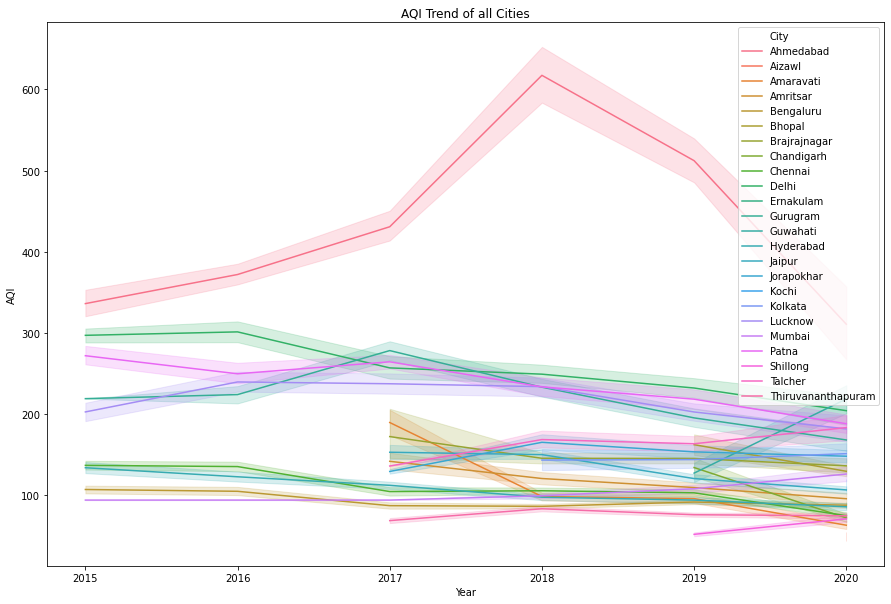

In [91]:
import seaborn as sns
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Year',hue='City',data=air).set_title("AQI Trend of all Cities")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### We can see that Ahmedabad has more than doubled its AQI from 2017 onwards

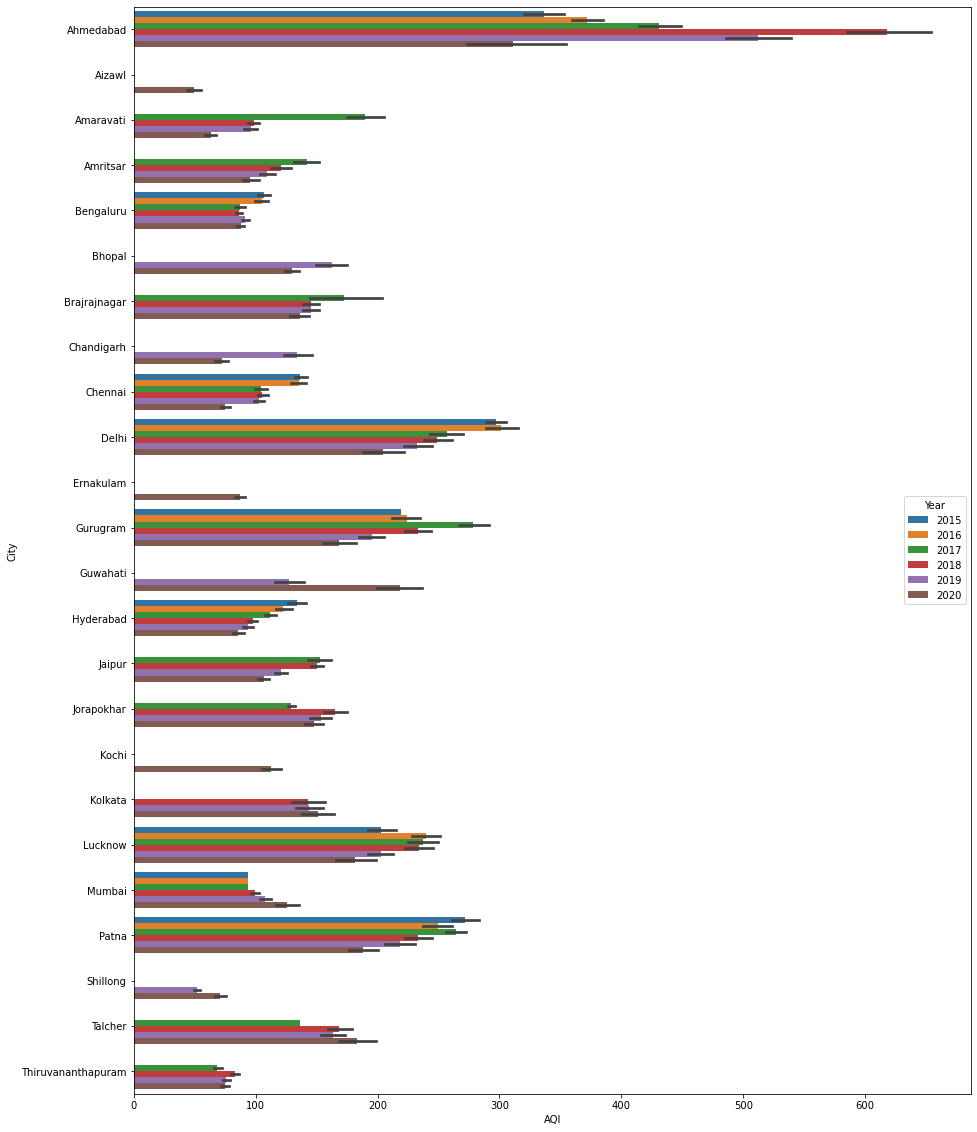

In [92]:
import seaborn as sns
dim = (15,20)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='City',x='AQI',hue='Year',data=air)
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],['Ahmedabad','Aizawl','Amaravati','Amritsar','Bengaluru','Bhopal','Brajrajnagar','Chandigarh','Chennai','Delhi','Ernakulam','Gurugram','Guwahati','Hyderabad','Jaipur','Jorapokhar','Kochi','Kolkata','Lucknow','Mumbai','Patna','Shillong','Talcher','Thiruvananthapuram'])


In [43]:
# Sum of pollution
import plotly.express as px

df = air.drop(columns = ['Date', 'AQI_layers', 'AQI']).groupby('City').sum().reset_index()
fig = px.treemap(pd.melt(df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

#### Checking AQI of Ahmedabad

In [93]:
# Selecting data from Ahmedabad only
air_ah = air[air['City']=='Ahmedabad']

In [94]:
air_ah

City       Date  PM2.5     NO    NO2    NOx     CO    SO2      O3  \
0     Ahmedabad 2015-01-01  52.22   0.92  18.22  17.15   0.92  27.64  133.36   
1     Ahmedabad 2015-01-02  52.22   0.97  15.69  16.46   0.97  24.55   34.06   
2     Ahmedabad 2015-01-03  52.22  17.40  19.30  29.70  17.40  29.07   30.70   
3     Ahmedabad 2015-01-04  52.22   1.70  18.48  17.97   1.70  18.59   36.08   
4     Ahmedabad 2015-01-05  52.22  22.10  21.42  37.76  22.10  39.33   39.31   
...         ...        ...    ...    ...    ...    ...    ...    ...     ...   
1943  Ahmedabad 2020-04-27  31.76   3.99  19.95  12.70   0.46  29.73   52.46   
1944  Ahmedabad 2020-04-28  32.55   3.53  23.58  14.12   0.46  42.86   50.20   
1945  Ahmedabad 2020-04-29  27.15   3.18  24.82  14.40   0.67  32.97   54.81   
1946  Ahmedabad 2020-04-30  26.93   2.76  17.05  10.37   0.46  37.70   56.97   
1947  Ahmedabad 2020-05-01  44.10   2.75  14.02   8.90   0.58   3.96    5.24   

      Benzene  Toluene    AQI AQI_layers  Year  Month Months  
0        0.00     0.02  401.0  Hazardous  2015      1    Jan  
1        3.68     5.50  401.0  Hazardous  2015      1    Jan  
2        6.80    16.40  401.0  Hazardous  2015      1    Jan  
3        4.43    10.14  401.0  Hazardous  2015      1    Jan  
4        7.01    18.89  401.0  Hazardous  2015      1    Jan  
...       ...      ...    ...        ...   ...    ...    ...  
1943     3.52    20.49  117.0       Poor  2020      4    Apr  
1944     4.92    32.73  130.0       Poor  2020      4    Apr  
1945     3.39    32.14  122.0       Poor  2020      4    Apr  
1946     1.92    18.54  128.0       Poor  2020      4    Apr  
1947     2.49    37.85  134.0       Poor  2020      5    May  

[1948 rows x 16 columns]

In [95]:
#air_ah['Monthly_AQI'] = air_ah.groupby(['Month'])['AQI'].mean()

In [96]:
# Lets check the data by grouping the data by Year and Month
air_ahm = air_ah.groupby(['Year','Months'],as_index=False).mean()

In [97]:
air_ahm

Year Months       PM2.5         NO        NO2        NOx         CO  \
0   2015    Apr  101.682000   7.306333  20.754000  26.932333   7.306333   
1   2015    Aug   40.880000  10.908710  17.386774  28.175161  10.908710   
2   2015    Dec   52.220000  10.150000  21.830000  24.300000   0.930000   
3   2015    Feb  109.257143  20.569643  30.298929  48.147143  19.581786   
4   2015    Jan   56.150645  22.679677  26.846774  39.480968  22.382258   
..   ...    ...         ...        ...        ...        ...        ...   
60  2020    Apr   31.055667   3.783333  23.090667  13.818000   1.574667   
61  2020    Feb   73.890690  26.835517  62.714828  50.254483  26.835517   
62  2020    Jan   54.211613  15.889032  19.589677  20.024516  15.889032   
63  2020    Mar   45.255806   8.305484  33.917419  22.370000   8.305484   
64  2020    May   44.100000   2.750000  14.020000   8.900000   0.580000   

          SO2         O3   Benzene    Toluene         AQI  Month  
0   51.233333  31.376000  2.681333   7.461000  324.033333      4  
1    9.254516  30.226129  1.096452   2.261935  223.967742      8  
2    9.120000  30.890000  0.980000   2.850000  401.000000     12  
3   57.400357  46.747500  7.812500  21.042500  507.821429      2  
4   43.602903  46.350645  1.463871   2.531290  396.096774      1  
..        ...        ...       ...        ...         ...    ...  
60  25.332667  46.286333  4.667667  25.917667  120.733333      4  
61  56.185172  48.562414  1.389310  36.406552  547.689655      2  
62  51.154516  26.437097  2.349677  30.991935  307.903226      1  
63  43.710645  41.877419  3.405161  35.347742  281.451613      3  
64   3.960000   5.240000  2.490000  37.850000  134.000000      5  

[65 rows x 13 columns]

In [98]:
# Lets check the data for year 2009 only
air_ahm[air_ahm.Year=='2019']

Year Months      PM2.5         NO         NO2         NOx         CO  \
48  2019    Apr  93.911667  26.394000   67.445000   53.189000  25.779333   
49  2019    Aug  43.460645  33.011290   48.180645   59.893871  33.011290   
50  2019    Dec  63.708065  11.702903   39.133226   28.336774  11.702903   
51  2019    Feb  61.619286  25.738214   72.191786   31.572143  25.738214   
52  2019    Jan  89.456452  42.160000   82.761290   47.808065  42.160000   
53  2019    Jul  43.720323  30.019032  111.667097   89.234516  30.019032   
54  2019    Jun  43.349667  20.633667  133.567000   89.773333  20.633667   
55  2019    Mar  66.989032  27.013226   74.672581   34.844839  27.013226   
56  2019    May  52.871290  16.860323   72.506129   47.693226  15.670645   
57  2019    Nov  61.803667  20.118667  141.910667   92.152000  20.118667   
58  2019    Oct  78.065161  31.058710  153.196774  106.754516  31.058710   
59  2019    Sep  44.338667  25.376667   82.596667   69.126667  25.376667   

           SO2         O3    Benzene    Toluene         AQI  Month  
48   32.296667  41.897333   3.984333  30.506000  610.266667      4  
49   43.275484  42.879355   2.118065  29.452258  516.870968      8  
50   57.484516  28.898387   3.460323  17.242903  293.548387     12  
51   51.027143  44.674286   4.103214  32.349286  560.535714      2  
52   63.513226  52.268387   4.097097  32.354839  755.516129      1  
53   72.270323  45.998710   6.163871  77.871935  477.967742      7  
54   65.470667  62.538333  13.067667  97.210333  395.133333      6  
55   46.618710  47.583871   4.124516  32.382581  601.741935      3  
56   91.518387  37.698387  10.444839  58.105806  410.870968      5  
57  135.966333  33.660667   2.212333  28.636000  451.000000     11  
58  122.555484  73.001290   2.867097  23.620645  614.225806     10  
59   69.244333  44.091000   1.775667  26.734333  459.633333      9

In [99]:
#!pip install pandasql

In [100]:
import pandasql as ps

In [101]:
# Selecting Ahmedabad data for 2019 only
am = ps.sqldf("Select * from air_ahm where Year='2019';",globals())

In [102]:
am

Year Months      PM2.5         NO         NO2         NOx         CO  \
0   2019    Apr  93.911667  26.394000   67.445000   53.189000  25.779333   
1   2019    Aug  43.460645  33.011290   48.180645   59.893871  33.011290   
2   2019    Dec  63.708065  11.702903   39.133226   28.336774  11.702903   
3   2019    Feb  61.619286  25.738214   72.191786   31.572143  25.738214   
4   2019    Jan  89.456452  42.160000   82.761290   47.808065  42.160000   
5   2019    Jul  43.720323  30.019032  111.667097   89.234516  30.019032   
6   2019    Jun  43.349667  20.633667  133.567000   89.773333  20.633667   
7   2019    Mar  66.989032  27.013226   74.672581   34.844839  27.013226   
8   2019    May  52.871290  16.860323   72.506129   47.693226  15.670645   
9   2019    Nov  61.803667  20.118667  141.910667   92.152000  20.118667   
10  2019    Oct  78.065161  31.058710  153.196774  106.754516  31.058710   
11  2019    Sep  44.338667  25.376667   82.596667   69.126667  25.376667   

           SO2         O3    Benzene    Toluene         AQI  Month  
0    32.296667  41.897333   3.984333  30.506000  610.266667      4  
1    43.275484  42.879355   2.118065  29.452258  516.870968      8  
2    57.484516  28.898387   3.460323  17.242903  293.548387     12  
3    51.027143  44.674286   4.103214  32.349286  560.535714      2  
4    63.513226  52.268387   4.097097  32.354839  755.516129      1  
5    72.270323  45.998710   6.163871  77.871935  477.967742      7  
6    65.470667  62.538333  13.067667  97.210333  395.133333      6  
7    46.618710  47.583871   4.124516  32.382581  601.741935      3  
8    91.518387  37.698387  10.444839  58.105806  410.870968      5  
9   135.966333  33.660667   2.212333  28.636000  451.000000     11  
10  122.555484  73.001290   2.867097  23.620645  614.225806     10  
11   69.244333  44.091000   1.775667  26.734333  459.633333      9

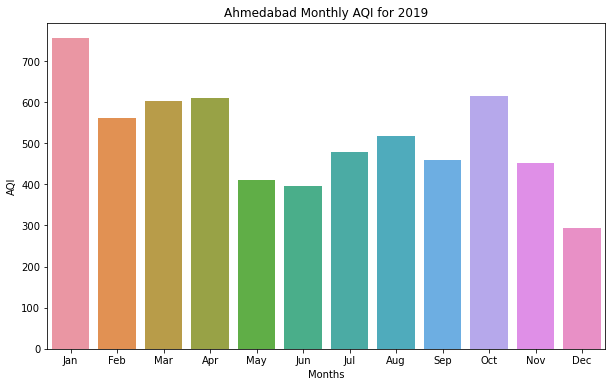

In [103]:
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='Months', y="AQI", data=am,order=mon )
plt.title('Ahmedabad Monthly AQI for 2019')
plt.xlabel('Months')
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('AQI')
plt.show()

#### January has the highest AQI

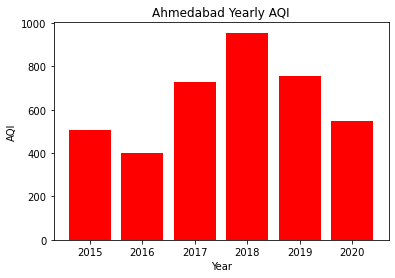

In [104]:
# Lets polt yearly AQI of Ahmedabad
plt.bar(air_ahm.Year,air_ahm.AQI,color='Red')
plt.title('Ahmedabad Yearly AQI')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()

Text(0.5, 1.0, 'Ahmedabad AQI details')

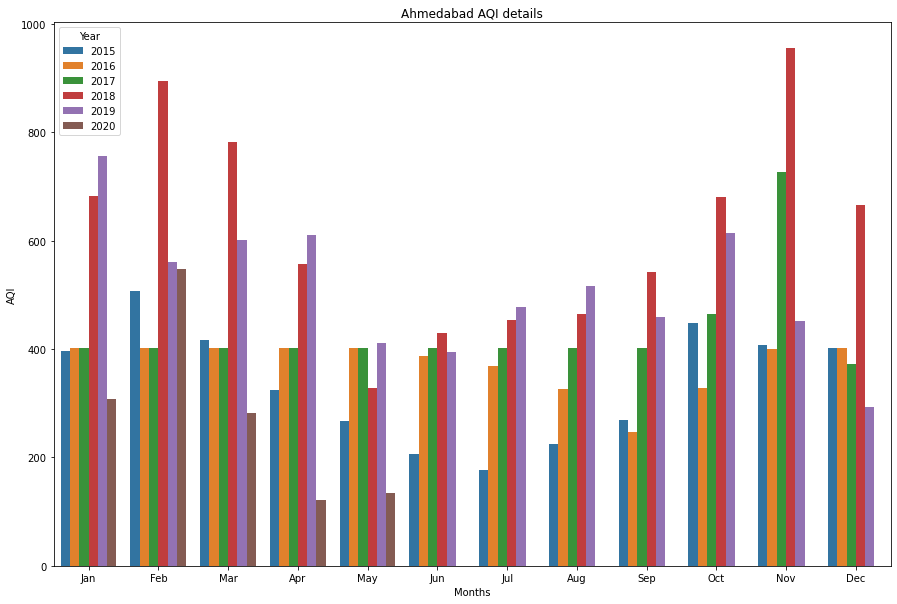

In [105]:
# Lets check the monthly AQI of Ahmedabad for every years
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import seaborn as sns
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=air_ahm,order=mon).set_title('Ahmedabad AQI details')
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## We can see that November has the highest average AQI followed by February, March,January, October, December in the year 2018

## Average AQI of all years seems to be high for the months of October, November, December, January, February, March and April.

## May seems to have the lowest average AQI of all years

## For 2020, February has the highest average AQI

Text(0.5, 1.0, 'Ahmedabad AQI Trend 2019')

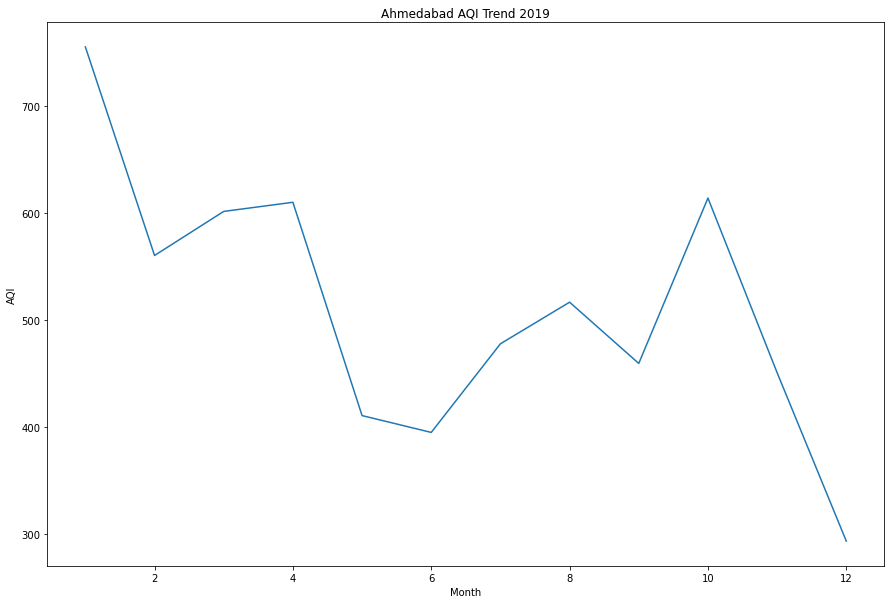

In [132]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=air_ahm[air_ahm['Year']=='2019']).set_title("Ahmedabad AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Ahmedabad AQI Trend 2019')

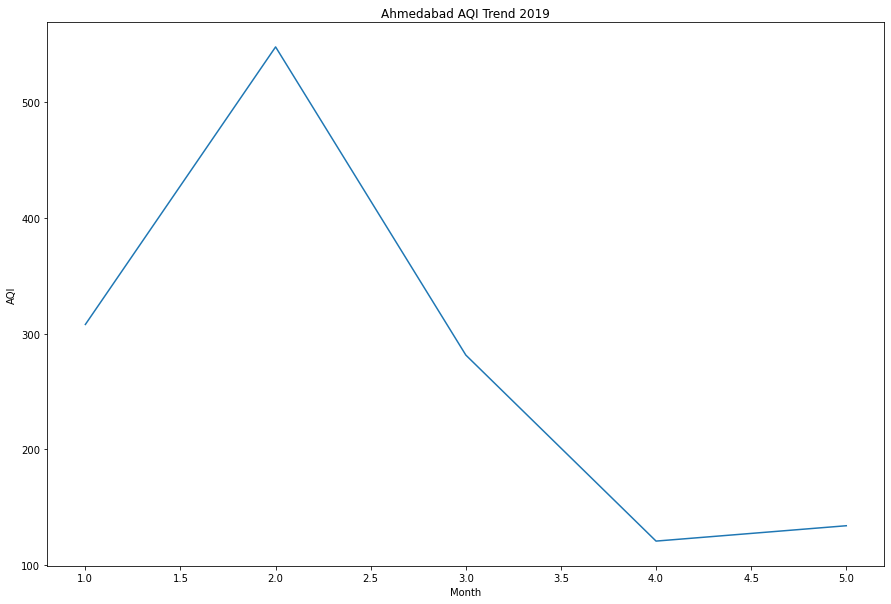

In [133]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=air_ahm[air_ahm['Year']=='2020']).set_title("Ahmedabad AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2019, The AQI of Ahmedabad has dropped from october onwards.
### In 2020, AQI has dropped significantly from February showing the effect of lockdown

In [106]:
air.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Delhi',
       'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur',
       'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna',
       'Shillong', 'Talcher', 'Thiruvananthapuram'], dtype=object)

### Lets select data of all the cities individually in their respective Dataframes

In [107]:
nmp = air['City'].unique()
lst = nmp.tolist()

In [108]:
lst.remove('Ahmedabad')
lst

['Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram']

In [109]:
len(lst)

23

In [110]:
# Saving all the individual city dataframes in the list lst2
lst2 = lst.copy()
lst3 = lst.copy()
y=0
for x in lst:
    lst2[y]= air[air['City']==x]
    #lst3[y] = lst2[y].groupby(['Year','Month'],as_index=False).mean()
    y+=1


In [111]:
lst2

[        City       Date  PM2.5     NO   NO2    NOx    CO   SO2     O3  \
 1948  Aizawl 2020-03-11  32.69   6.99  2.85  11.93  0.60  4.53   4.48   
 1949  Aizawl 2020-03-12  31.21   7.20  1.27  10.65  0.56  4.22   2.81   
 1950  Aizawl 2020-03-13  38.39   7.19  0.91  10.37  0.57  4.46   0.18   
 1951  Aizawl 2020-03-14  43.23   7.14  1.07  10.48  0.57  4.53   0.41   
 1952  Aizawl 2020-03-15  33.82   7.09  0.36   9.73  0.48  4.63   0.30   
 1953  Aizawl 2020-03-16  27.14   5.63  2.32   8.09  0.50  4.71  13.02   
 1954  Aizawl 2020-03-17  27.32   3.07  2.14   3.41  0.48  4.84   6.03   
 1955  Aizawl 2020-03-18  31.76   3.00  1.48   5.24  0.47  5.04   8.76   
 1956  Aizawl 2020-03-19  43.80   2.97  1.31   4.97  0.48  5.30   9.96   
 1957  Aizawl 2020-03-20  35.48   3.01  0.83   4.64  0.49  5.32   6.43   
 1958  Aizawl 2020-03-21  51.27   3.01  0.88   4.62  0.49  5.63   8.62   
 1959  Aizawl 2020-03-22  33.24   2.93  0.13   3.65  0.37  5.41   5.64   
 1960  Aizawl 2020-03-23  35.34   2.98

In [113]:
# Saving the dataframes to their own variables as City names
Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Delhi,Ernakulam,Gurugram,Guwahati,Hyderabad,Jaipur,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram=lst2

In [114]:
Aizawl

City       Date  PM2.5     NO   NO2    NOx    CO   SO2     O3  \
1948  Aizawl 2020-03-11  32.69   6.99  2.85  11.93  0.60  4.53   4.48   
1949  Aizawl 2020-03-12  31.21   7.20  1.27  10.65  0.56  4.22   2.81   
1950  Aizawl 2020-03-13  38.39   7.19  0.91  10.37  0.57  4.46   0.18   
1951  Aizawl 2020-03-14  43.23   7.14  1.07  10.48  0.57  4.53   0.41   
1952  Aizawl 2020-03-15  33.82   7.09  0.36   9.73  0.48  4.63   0.30   
1953  Aizawl 2020-03-16  27.14   5.63  2.32   8.09  0.50  4.71  13.02   
1954  Aizawl 2020-03-17  27.32   3.07  2.14   3.41  0.48  4.84   6.03   
1955  Aizawl 2020-03-18  31.76   3.00  1.48   5.24  0.47  5.04   8.76   
1956  Aizawl 2020-03-19  43.80   2.97  1.31   4.97  0.48  5.30   9.96   
1957  Aizawl 2020-03-20  35.48   3.01  0.83   4.64  0.49  5.32   6.43   
1958  Aizawl 2020-03-21  51.27   3.01  0.88   4.62  0.49  5.63   8.62   
1959  Aizawl 2020-03-22  33.24   2.93  0.13   3.65  0.37  5.41   5.64   
1960  Aizawl 2020-03-23  35.34   2.98  0.16   3.71  0.32  5.63   5.73   
1961  Aizawl 2020-03-24  47.34   2.96  0.14   3.66  0.37  6.17   5.59   
1962  Aizawl 2020-03-25  53.64   2.96  0.17   3.77  0.44  6.75   6.44   
1963  Aizawl 2020-03-26  54.90   2.96  0.13   3.69  0.42  6.80   5.87   
1964  Aizawl 2020-03-27  44.64   2.94  0.11   3.59  0.40  7.34   6.42   
1965  Aizawl 2020-03-28  51.33   2.92  0.35   3.89  0.44  7.69   8.76   
1966  Aizawl 2020-03-29  34.54   2.93  0.13   3.64  0.36  7.80   7.99   
1967  Aizawl 2020-03-30  39.47   2.93  0.24   3.79  0.42  7.67   7.40   
1968  Aizawl 2020-03-31  27.27   2.95  0.25   3.80  0.40  7.90   6.74   
1969  Aizawl 2020-04-01  38.60   2.98  0.26   3.94  0.45  8.11   6.12   
1970  Aizawl 2020-04-02  36.22   2.93  0.25   3.86  0.40  8.36   9.24   
1971  Aizawl 2020-04-03  30.35   2.90  0.21   3.75  0.29  8.25  10.87   
1972  Aizawl 2020-04-04  24.05   2.97  0.25   3.79  0.26  8.16  11.09   
1973  Aizawl 2020-04-05  26.47   2.96  0.08   3.50  0.31  8.79   5.76   
1974  Aizawl 2020-04-06  35.13   2.96  0.15   3.69  0.31  8.49   7.94   
1975  Aizawl 2020-04-07  33.19   2.92  0.30   3.85  0.30  8.78  13.38   
1976  Aizawl 2020-04-08  24.92   2.97  0.18   3.74  0.27  8.69   9.67   
1977  Aizawl 2020-04-09  39.15   3.32  0.31   4.47  0.39  7.81   7.66   
1978  Aizawl 2020-04-10  38.01   4.41  0.13   5.70  0.41  4.52   5.62   
1979  Aizawl 2020-04-11  30.06   4.37  0.17   5.74  0.37  4.77   6.71   
1980  Aizawl 2020-04-12  21.70   4.33  0.12   5.60  0.27  4.54   8.47   
1981  Aizawl 2020-04-13  28.33   6.24  0.39   8.44  0.36  5.30  10.16   
1982  Aizawl 2020-04-14  46.26  10.26  0.45  14.04  0.47  5.66   2.97   
1983  Aizawl 2020-04-15  40.72  11.40  0.51  15.65  0.42  5.71   0.72   
1984  Aizawl 2020-04-16  22.63  11.40  0.33  15.49  0.28  5.52   0.79   
1985  Aizawl 2020-04-17  15.06  11.40  0.36  15.51  0.22  5.43   2.46   
1986  Aizawl 2020-04-18  19.50  11.44  0.25  15.38  0.25  6.06   1.17   
1987  Aizawl 2020-04-19  10.48  11.44  0.11  15.20  0.22  6.40   1.27   
1988  Aizawl 2020-04-20  11.79  11.47  0.95  16.08  0.25  6.79   8.71   
1989  Aizawl 2020-04-21   9.53  11.54  0.75  15.94  0.27  6.62   7.67   
1990  Aizawl 2020-04-22   8.53  11.47  0.34  15.48  0.24  6.61   1.30   
1991  Aizawl 2020-04-23  10.42  11.56  0.26  15.49  0.26  6.96   1.75   
1992  Aizawl 2020-04-24   5.74  11.53  0.34  15.57  0.21  6.79   1.16   
1993  Aizawl 2020-04-25   3.14  11.51  0.20  14.68  0.18  7.47   0.55   
1994  Aizawl 2020-04-26   1.97  11.54  0.13  15.25  0.18  6.98   1.78   
1995  Aizawl 2020-04-27   5.40  11.62  0.27  15.57  0.25  7.21   0.22   
1996  Aizawl 2020-04-28   3.55  11.70  0.18  15.60  0.26  6.97  30.89   
1997  Aizawl 2020-04-29   3.85  11.60  0.17  15.40  0.21  7.23  30.89   
1998  Aizawl 2020-04-30   4.49  11.70  0.30  15.65  0.24  6.60   1.55   
1999  Aizawl 2020-05-01  52.22  11.58  0.03  15.19  0.25  5.91  30.89   

      Benzene  Toluene   AQI AQI_layers  Year  Month Months  
1948     0.03     0.30  52.0   Moderate  2020      3    Mar  
1949     0.01 

In [115]:
Aizawl.shape

(52, 16)

In [116]:
#Aizawl_month,Amaravati_month,Amritsar_month,Bengaluru_month,Bhopal_month,Brajrajnagar_month,Chandigarh_month,Chennai_month,Delhi_month,Ernakulam_month,Gurugram_month,Guwahati_month,Hyderabad_month,Jaipur_month,Jorapokhar_month,Kochi_month,Kolkata_month,Lucknow_month,Mumbai_month,Patna_month,Shillong_month,Talcher_month,Thiruvananthapuram=lst3

# Aizawl

In [117]:
Aizawl.Year.unique()

array(['2020'], dtype=object)

In [118]:
Aizawl.Months.unique()

array(['Mar', 'Apr', 'May'], dtype=object)

Text(0.5, 1.0, 'Aizawl Month')

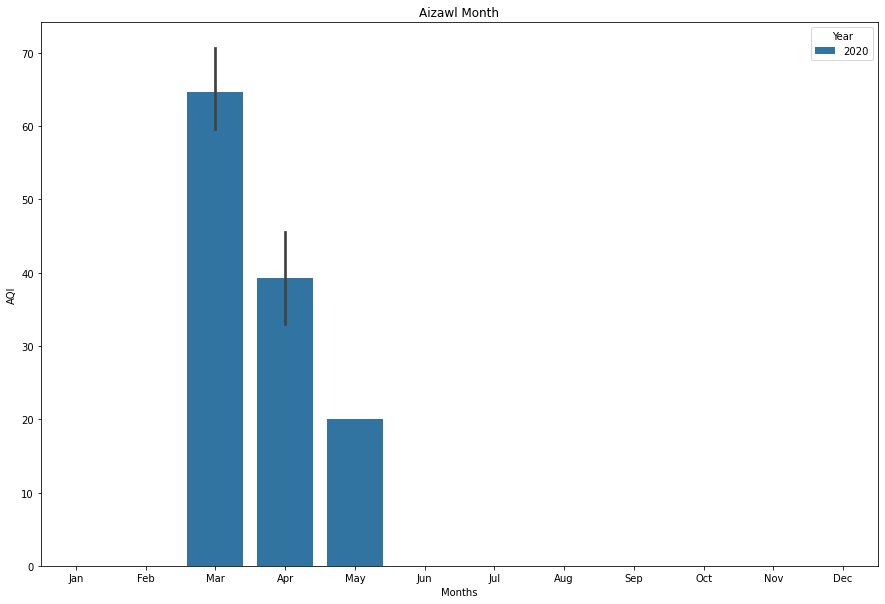

In [119]:
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import seaborn as sns
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Aizawl,order=mon).set_title("Aizawl Month")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Aizawl has data for only 3 months of 2020. March has the highest average AQI of around 68.

# Amaravati

Text(0.5, 1.0, 'Amaravati AQI details')

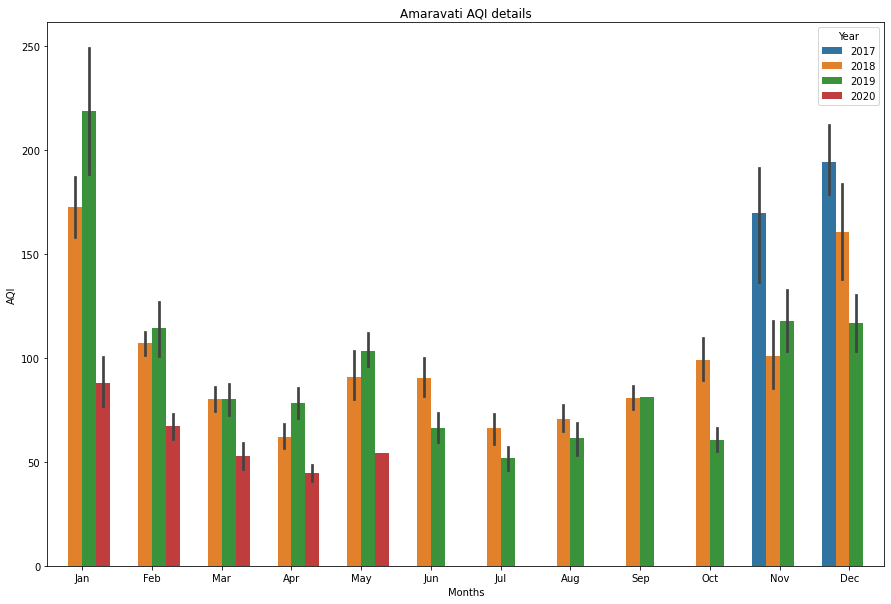

In [120]:
# Checking AQI of Amaravati
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import seaborn as sns
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Amaravati,order=mon).set_title("Amaravati AQI details")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## January has the highest average AQI in 2019

## Months of November, December and January seem to have the high average AQI for all years

Text(0.5, 1.0, 'Amaravati AQI Trend')

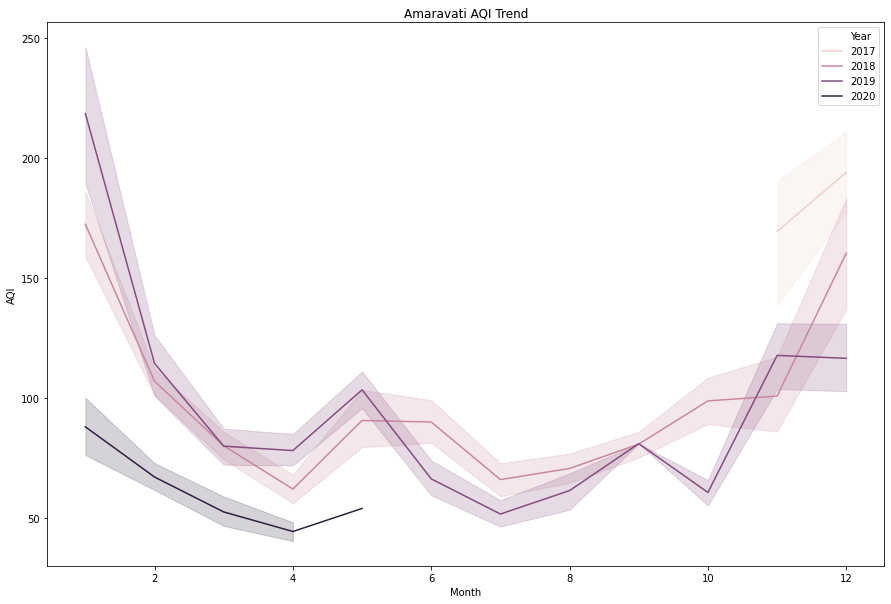

In [121]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',hue='Year',data=Amaravati).set_title("Amaravati AQI Trend")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

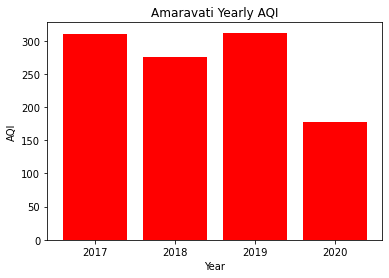

In [122]:
plt.bar(Amaravati.Year,Amaravati.AQI,color='Red')
plt.title('Amaravati Yearly AQI')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()

## 2017 and 2019 had the highest yearly AQI of 300.

## Yearly AQI has reduced drastically in 2020. It can be attributed to the lockdowns mandated by the Government due to Coronavirus

In [123]:
df_ama_max = ps.sqldf("Select Year,Months,max(AQI) as Maximum, min(AQI) as Minimum from Amaravati group by Year,Months;",globals())

In [124]:
df_ama_max

Year Months  Maximum  Minimum
0   2017    Dec    310.0    115.0
1   2017    Nov    198.0     81.0
2   2018    Apr     81.0     32.0
3   2018    Aug    112.0     47.0
4   2018    Dec    276.0     46.0
5   2018    Feb    136.0     57.0
6   2018    Jan    235.0    111.0
7   2018    Jul    106.0     29.0
8   2018    Jun    155.0     56.0
9   2018    Mar    113.0     51.0
10  2018    May    192.0     43.0
11  2018    Nov    215.0     45.0
12  2018    Oct    154.0     48.0
13  2018    Sep    106.0     52.0
14  2019    Apr    124.0     41.0
15  2019    Aug     92.0     24.0
16  2019    Dec    194.0     61.0
17  2019    Feb    178.0     58.0
18  2019    Jan    312.0     48.0
19  2019    Jul     81.0     28.0
20  2019    Jun    107.0     38.0
21  2019    Mar    130.0     45.0
22  2019    May    158.0     74.0
23  2019    Nov    198.0     49.0
24  2019    Oct     81.0     39.0
25  2019    Sep     81.0     81.0
26  2020    Apr     69.0     26.0
27  2020    Feb    110.0     44.0
28  2020    Jan    177.0     47.0
29  2020    Mar    108.0     35.0
30  2020    May     54.0     54.0

Text(0.5, 1.0, 'Amaravati Maximum AQI')

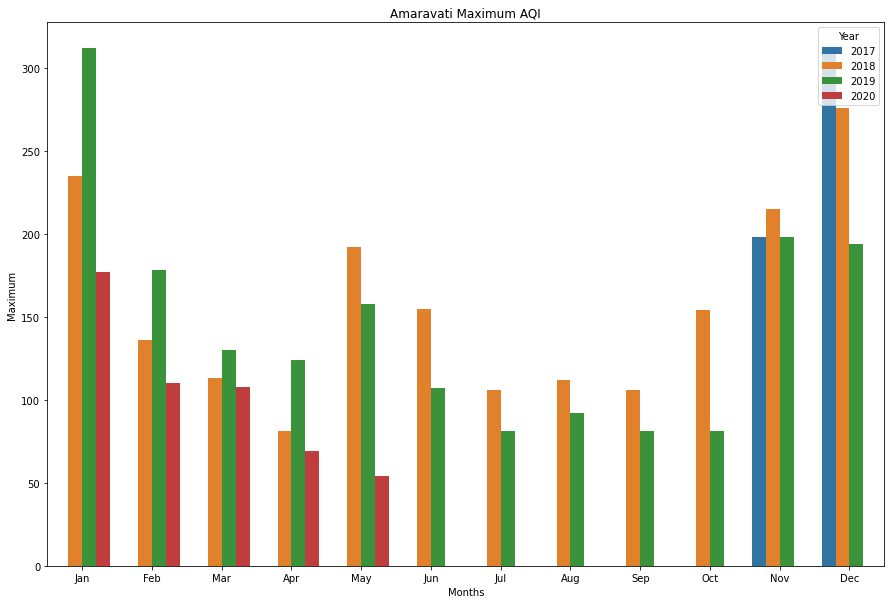

In [125]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='Maximum',x='Months',hue='Year',data=df_ama_max,order=mon).set_title("Amaravati Maximum AQI")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Amaravati Minimum AQI Trend')

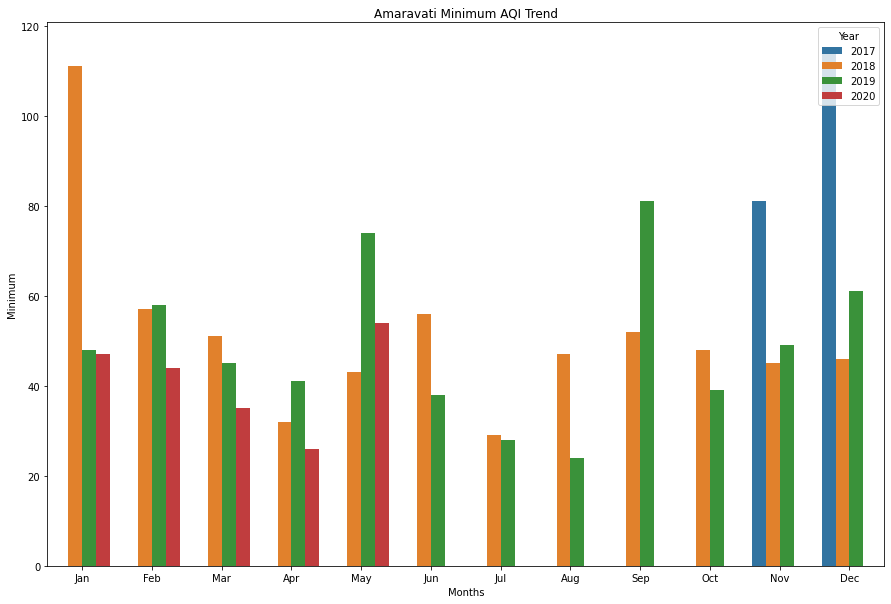

In [126]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='Minimum',x='Months',hue='Year',data=df_ama_max,order=mon).set_title("Amaravati Minimum AQI Trend")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Amritsar

In [127]:
Amritsar.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [128]:
Amritsar.Month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

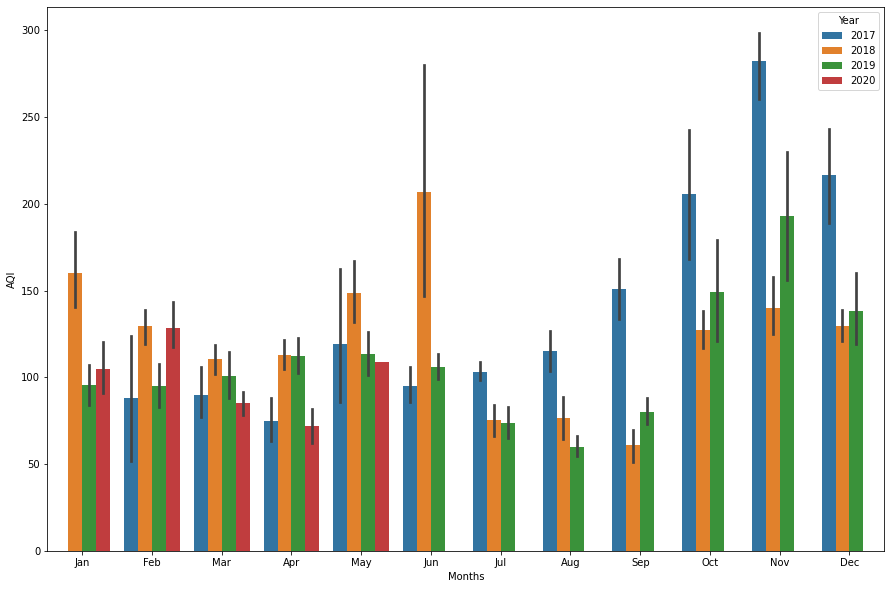

In [84]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Amritsar, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## November has the highest average AQI of year 2017 at 270.

## For all years average AQI seems to be high and increasing in the months of October, November and December.

## June has the highest average AQI in the year 2018



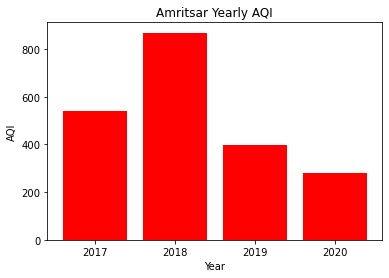

In [85]:
plt.bar(Amritsar.Year,Amritsar.AQI,color='Red')
plt.title('Amritsar Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Amritsar.Year)
plt.ylabel('AQI')
plt.show()

### 2018 has the highest Yearly average AQI at 800

### Coronavirus has affected Amritsar too by seeing the average yearly AQI being the lowest of all years at 280

# Bengaluru

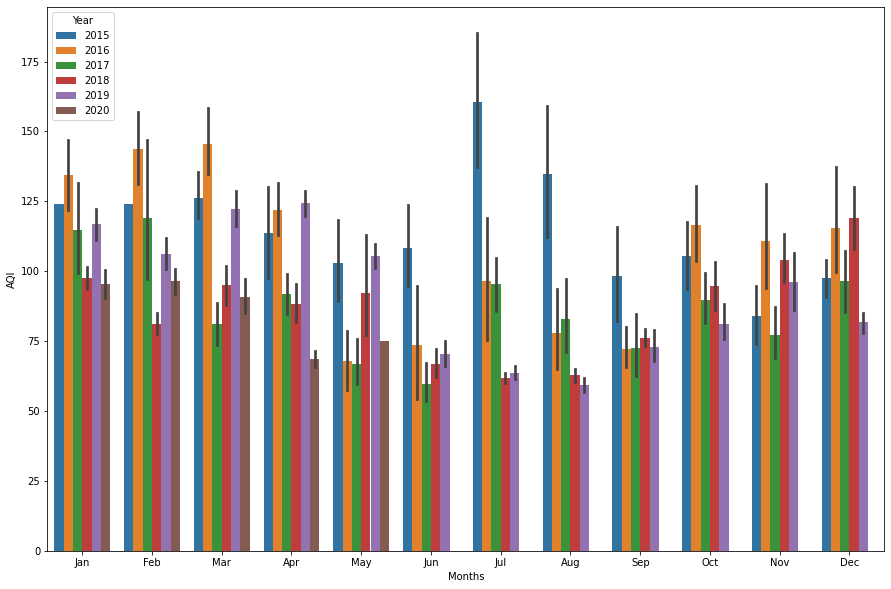

In [86]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Bengaluru, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## January, February, March, April has high average AQI for all years, while it is low in the other months.

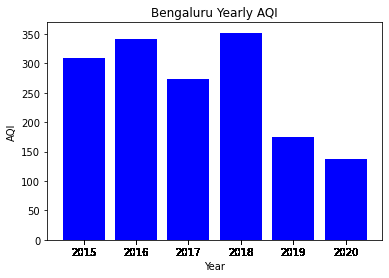

In [87]:
plt.bar(Bengaluru.Year,Bengaluru.AQI,color='Blue')
plt.title('Bengaluru Yearly AQI')
plt.xlabel('Year')
plt.xticks(Bengaluru.Year)
plt.ylabel('AQI')
plt.show()

## 2018 has the highest Yearly average AQI at 350

## Bengaluru has reduced her Yearly AQI drastically since 2019 with 2020 having the lowest AQI at 130

# Bhopal

In [88]:
Bhopal.Months.unique()

array(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'],
      dtype=object)

In [89]:
Bhopal.Year.unique()

array(['2019', '2020'], dtype=object)

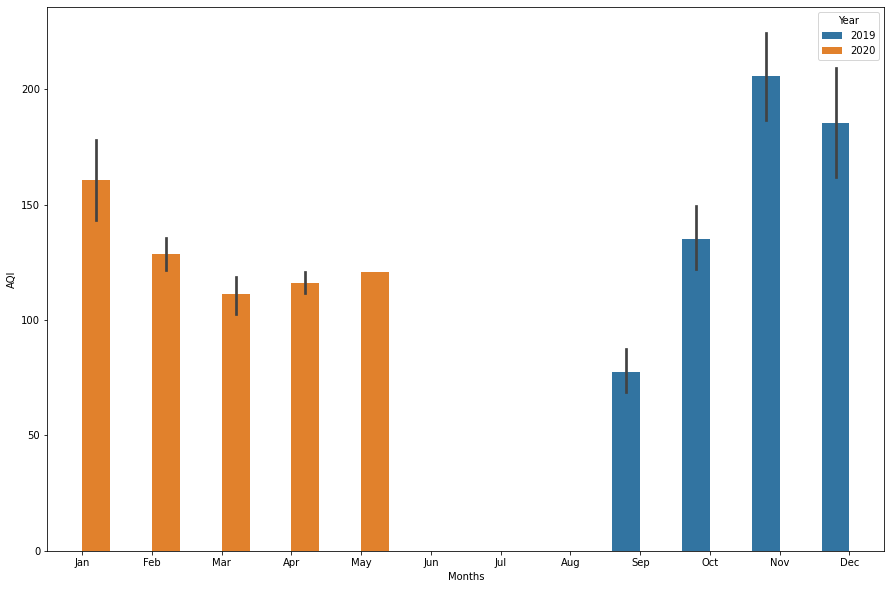

In [90]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Bhopal, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## With only 4 months of data in year 2019 and 5 months of data in 2020, it would not be conclusive to draw inferences for the city of Bhopal

## November of 2019 has the highest monthly AQI at 230

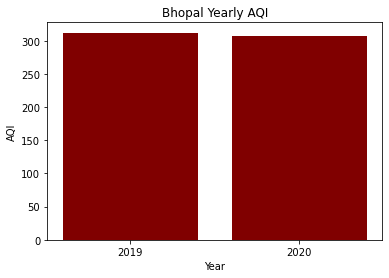

In [91]:
plt.bar(Bhopal.Year,Bhopal.AQI,color='Maroon')
plt.title('Bhopal Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Bhopal.Year)
plt.ylabel('AQI')
plt.show()

# Brajrajnagar

In [92]:
Brajrajnagar.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [93]:
Brajrajnagar.Months.unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov'], dtype=object)

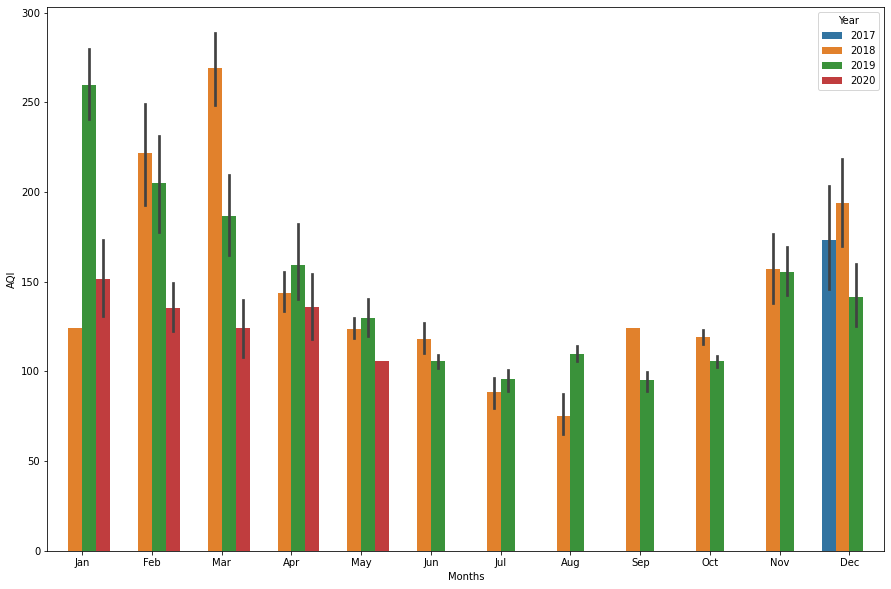

In [94]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Brajrajnagar, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## January, February and March have high average AQI in all years

## January has highest average AQI of 2019 at 260. While March has highest average AQI of 2018 at 270

## The AQI of January is the highest in the year 2020 at 150.

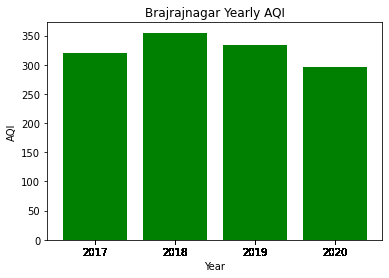

In [95]:
plt.bar(Brajrajnagar.Year,Brajrajnagar.AQI,color='Green')
plt.title('Brajrajnagar Yearly AQI')
plt.xlabel('Year')
plt.xticks(Brajrajnagar.Year)
plt.ylabel('AQI')
plt.show()

## Yearly AQI is highest in the year 2018

## 2020 has the lowest yearly AQI. This indicates the effect of Corona virus on this city

# Chandigarh

In [96]:
Chandigarh.Year.unique()

array(['2019', '2020'], dtype=object)

In [97]:
Chandigarh.Months.unique()

array(['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'],
      dtype=object)

## Only partial data of years 2019 and 2020 are available.

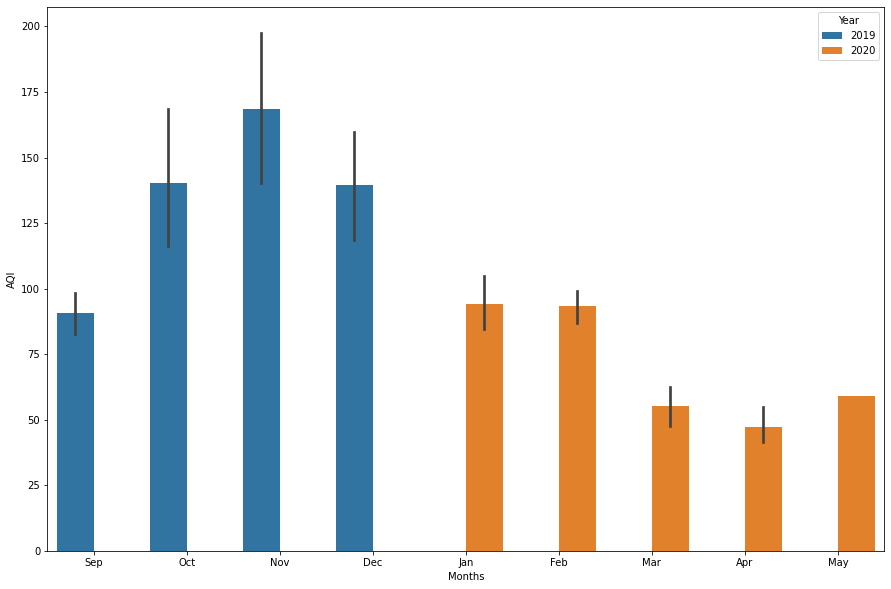

In [98]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Chandigarh)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

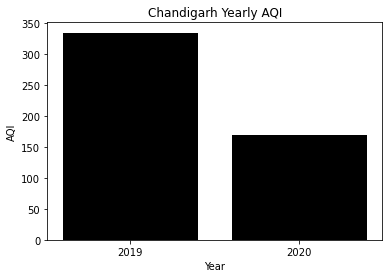

In [99]:
plt.bar(Chandigarh.Year,Chandigarh.AQI,color='Black')
plt.title('Chandigarh Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Chandigarh.Year)
plt.ylabel('AQI')
plt.show()

## The yearly AQI of 2020 is almost half of that of 2019. This indicates that the City is clearly affected by lockdowns due to Coronavirus.

# Chennai

In [100]:
Chennai.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [101]:
Chennai.Months.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

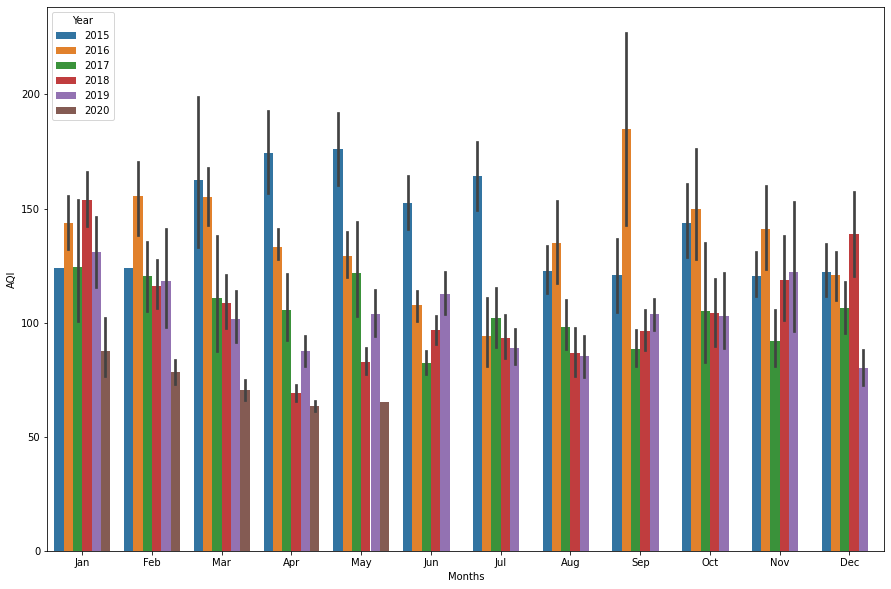

In [102]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Chennai)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Chennai AQI Trend 2019')

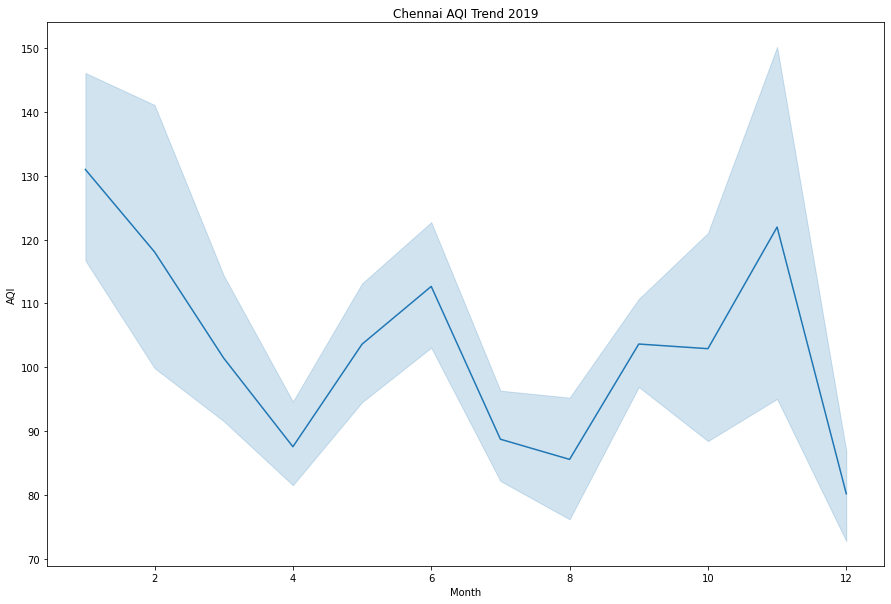

In [104]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Chennai[Chennai['Year']=='2019']).set_title("Chennai AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2019, the peak is in the month of November, while AQI drastically falls in December.

Text(0.5, 1.0, 'Chennai AQI Trend 2020')

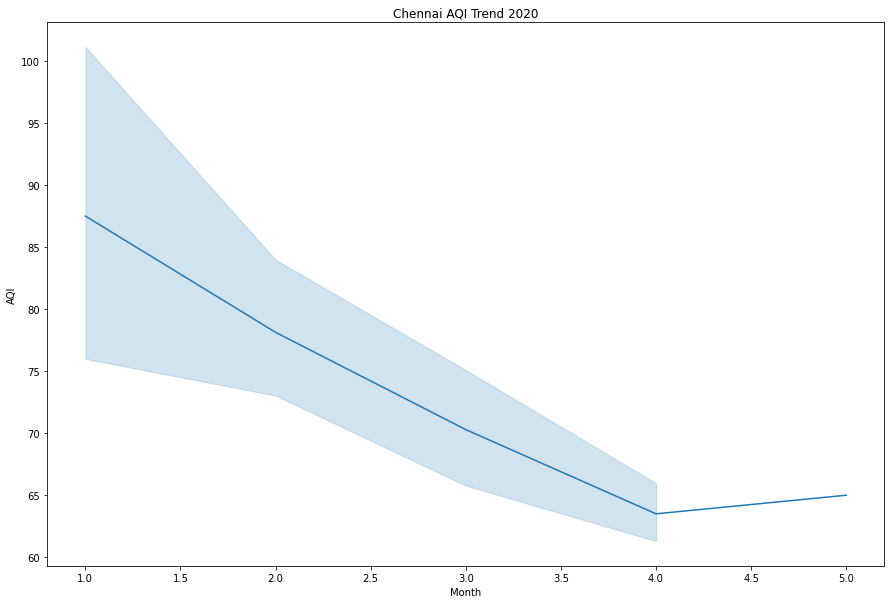

In [105]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Chennai[Chennai['Year']=='2020']).set_title("Chennai AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## The downward trend of AQI continues in 2020 and comes to the lowest in April.

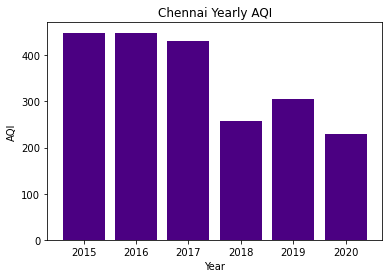

In [106]:
# Yearly AQI plot
plt.bar(Chennai.Year,Chennai.AQI,color='Indigo')
plt.title('Chennai Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Chennai.Year)
plt.ylabel('AQI')
plt.show()

## The city is improving her air quality (lowering AQI) every year from 2015 with the exception of the year 2019.

## 2020 has the lowest AQI at 220.

## This shows that the city is affected by Corona Virus, but not to the extent of other cities like Chandigarh and Bengaluru

# Delhi

In [107]:
Delhi.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [108]:
Delhi.Months.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

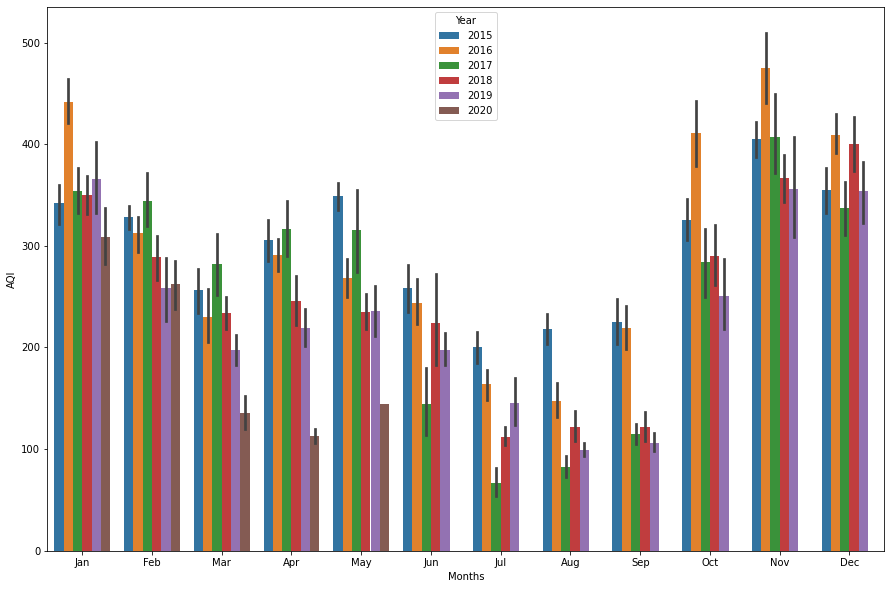

In [109]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Delhi, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## The months of October, November, December, January, February have high monthly AQI

Text(0.5, 1.0, 'Delhi AQI Trend 2019')

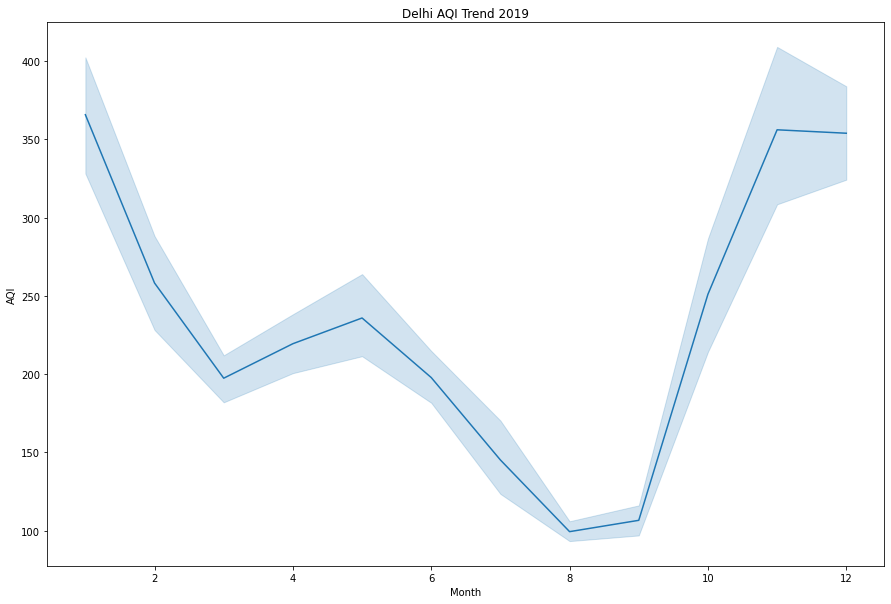

In [110]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Delhi[Delhi['Year']=='2019']).set_title("Delhi AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## We can see AQI fell drastically from January to March.

## AQI again raises drastically from September to November and keeps more or less steady through December

Text(0.5, 1.0, 'Delhi AQI Trend 2020')

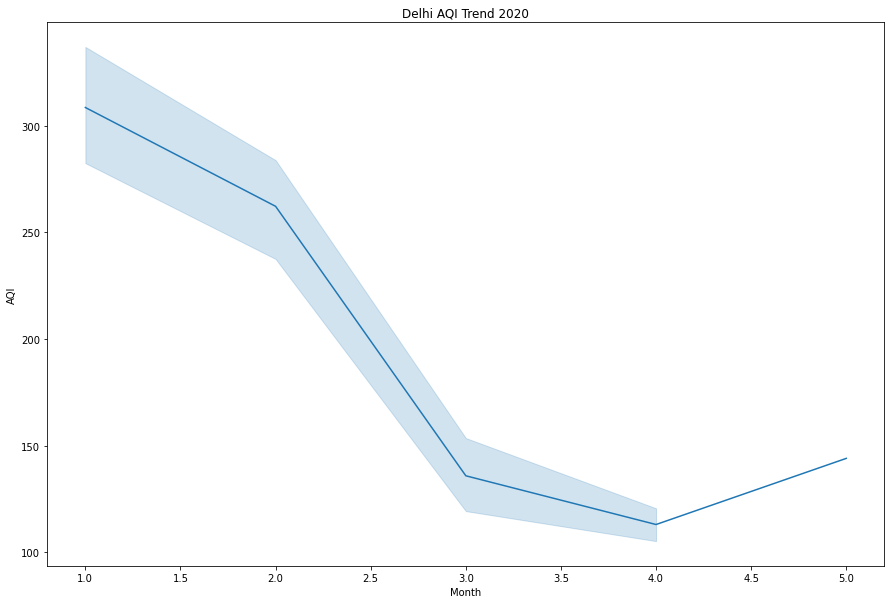

In [111]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Delhi[Delhi['Year']=='2020']).set_title("Delhi AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## AQI falls drastically from February owing to the lockdown imposed by Government for Coronavirus. 

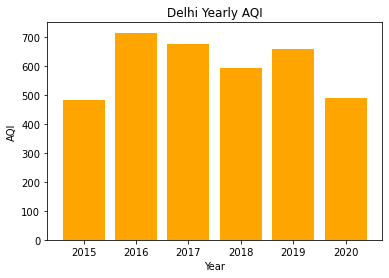

In [112]:
# Plotting the yearly AQI of Delhi
plt.bar(Delhi.Year,Delhi.AQI,color='Orange')
plt.title('Delhi Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Delhi.Year)
plt.ylabel('AQI')
plt.show()

## Being one of the worst polluted cities in the world, we can see that Delhi has lowest AQI of 480 in the years 2015 and 2020 which is much higher than those of the other cities.

# Ernakulam

In [113]:
Ernakulam.Year.unique()

array(['2020'], dtype=object)

In [114]:
Ernakulam.Months.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype=object)

In [115]:
Ernakulam.Month.unique()

array([1, 2, 3, 4, 5], dtype=int64)

### Data is available only for the first five months of 2020.

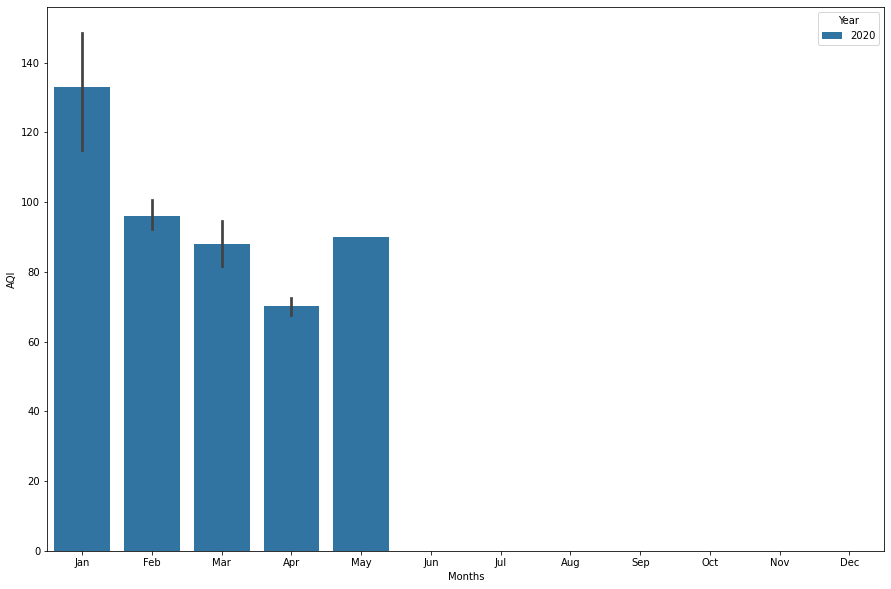

In [116]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Ernakulam, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### 2020 saw downfall of monthly average AQI till April, then a slight increase in May.

# Gurugram

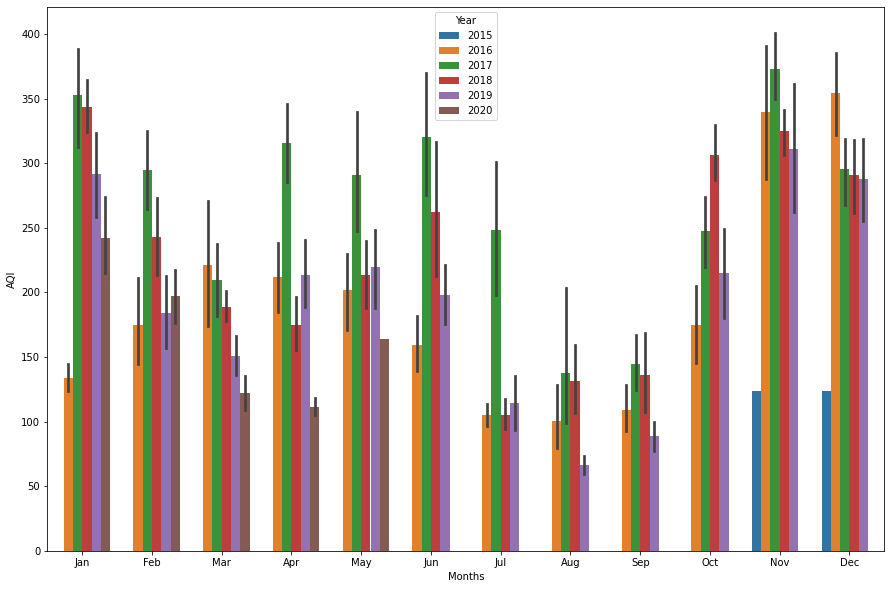

In [117]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Gurugram, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## November, December, January, February have the high AQI like many other cities.

Text(0.5, 1.0, 'Gurugram AQI Trend 2019')

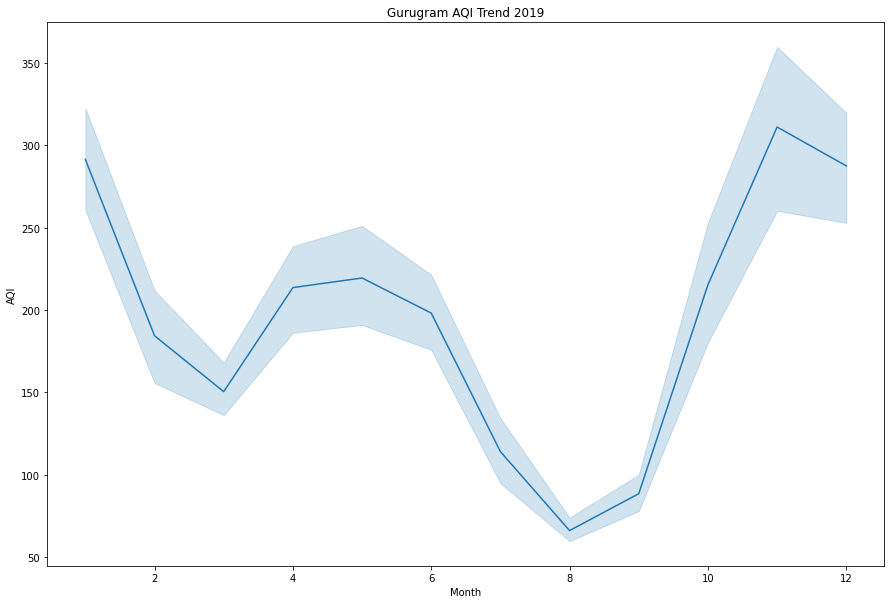

In [118]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Gurugram[Gurugram['Year']=='2019']).set_title("Gurugram AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## 2019 saw the lowest monthly AQI in the month of August.

## AQI rises drastically from September to November only to fall in December

Text(0.5, 1.0, 'Gurugram AQI Trend 2020')

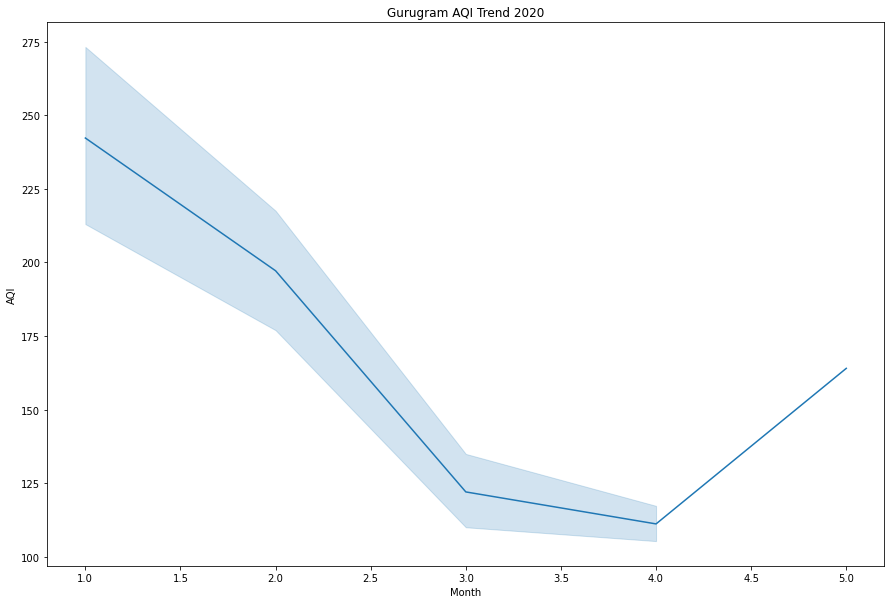

In [119]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Gurugram[Gurugram['Year']=='2020']).set_title("Gurugram AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Monthly AQI falls from January onwards showing the effect of Coronavirus

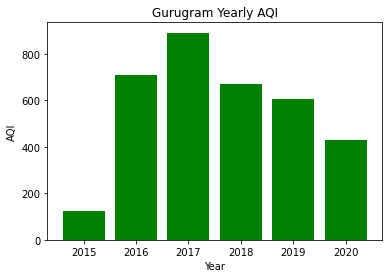

In [120]:
plt.bar(Gurugram.Year,Gurugram.AQI,color='Green')
plt.title('Gurugram Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Gurugram.Year)
plt.ylabel('AQI')
plt.show()

## 2015 had the lowest yearly AQI at 150

## AQI rises almost 433% to 650 in 2016 and rises more in 2017

## From 2017 onwards, AQI falls

## 2020 saw AQI of 420+ which is quite high w.r.t many other cities

# Guwahati

In [122]:
Guwahati.Year.unique()

array(['2019', '2020'], dtype=object)

In [124]:
Guwahati.Month.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

## Data of years 2019 and 2020 are only available. So inference from Guwahati cannot be conclusive.

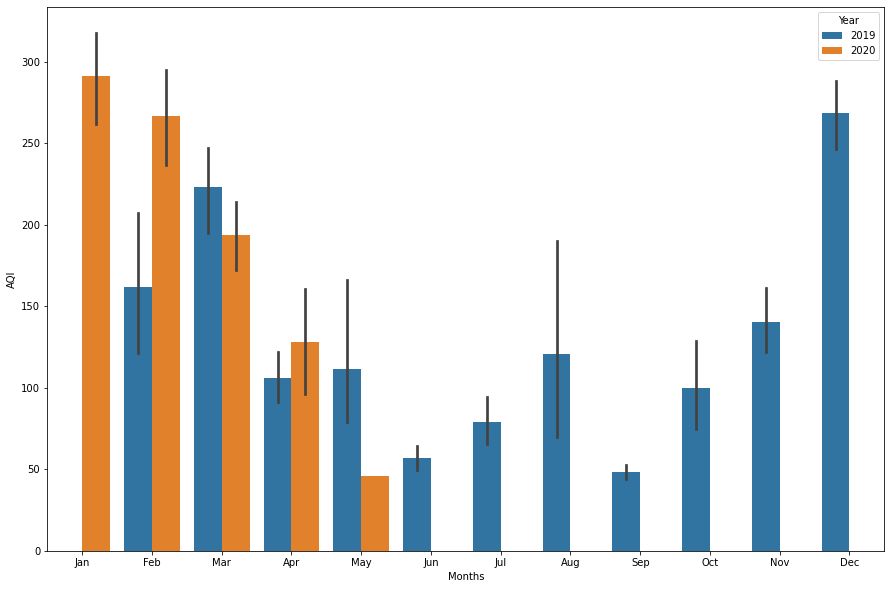

In [130]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Guwahati, order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## December in 2019 and January in 2020 have highest AQI for each year.

## In 2020, from February onwards, AQI fell consistently. This is clearly the effect of lockdowns imposed by the Government due to Coronavirus.

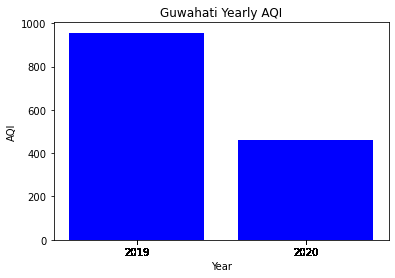

In [126]:
#Yearly plot
plt.bar(Guwahati.Year,Guwahati.AQI,color='Blue')
plt.title('Guwahati Yearly AQI')
plt.xlabel('Year')
plt.xticks(Guwahati.Year)
plt.ylabel('AQI')
plt.show()

## The average AQI of 2020 is almost half of that of 2019.

# Hyderabad

In [127]:
Hyderabad.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [128]:
Hyderabad.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

### We have data for 6 years on Hyderabad

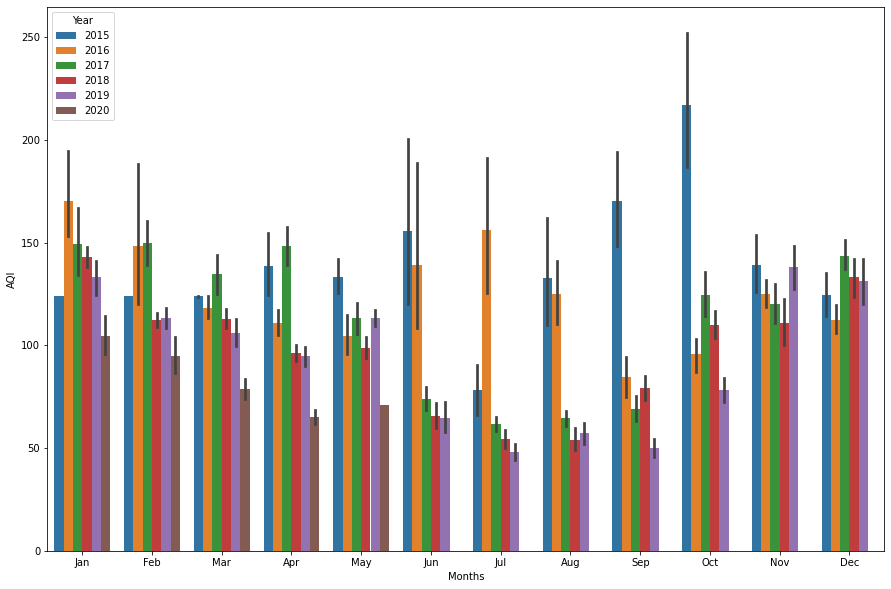

In [131]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Hyderabad,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Hyderabad seems to maintain more or less stable AQI each month for every year.

## Each year, month of June, July, August have the lowest AQI of that year.

Text(0.5, 1.0, 'Hyderabad AQI Trend 2019')

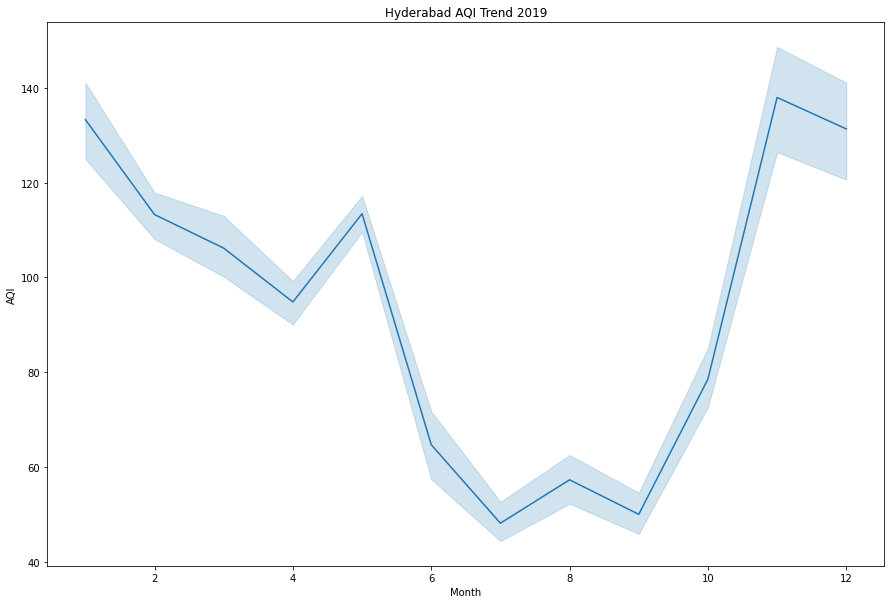

In [136]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Hyderabad[Hyderabad['Year']=='2019']).set_title("Hyderabad AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2019, AQI has fallen from May onwards, only to rise steeply from September.

Text(0.5, 1.0, 'Hyderabad AQI Trend 2020')

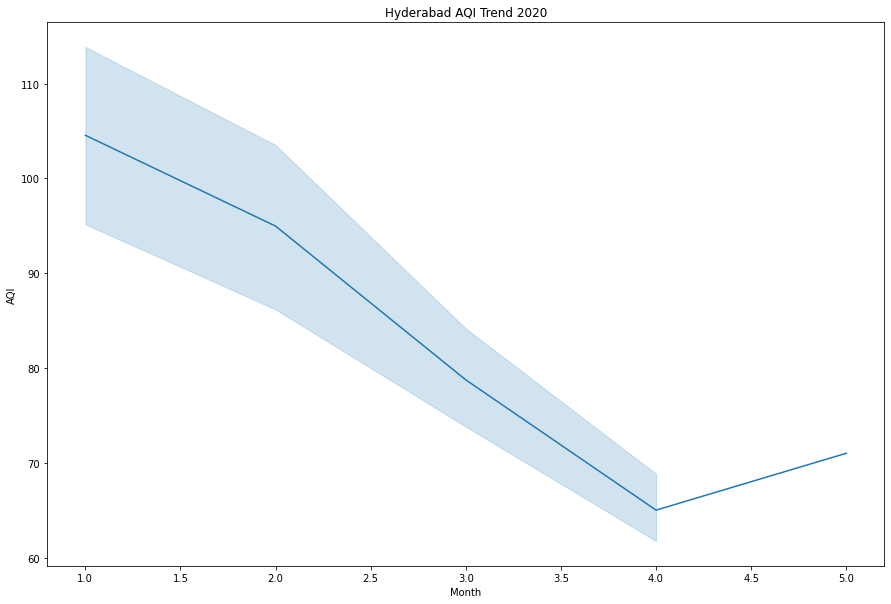

In [137]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Hyderabad[Hyderabad['Year']=='2020']).set_title("Hyderabad AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### AQI falls steeply from February onwards in the year 2020

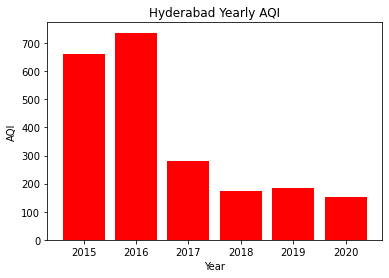

In [134]:
plt.bar(Hyderabad.Year,Hyderabad.AQI,color='Red')
plt.title('Hyderabad Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Hyderabad.Year)
plt.ylabel('AQI')
plt.show()

## Hyderabad has significantly lowered the average AQI from 2017.

## 2020 has the lowest average AQI, showing the effect of Coronavirus.

## But some other cities are much more affected by Corona than Hyderabad.

# Jaipur

In [138]:
Jaipur.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [139]:
Jaipur.Month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

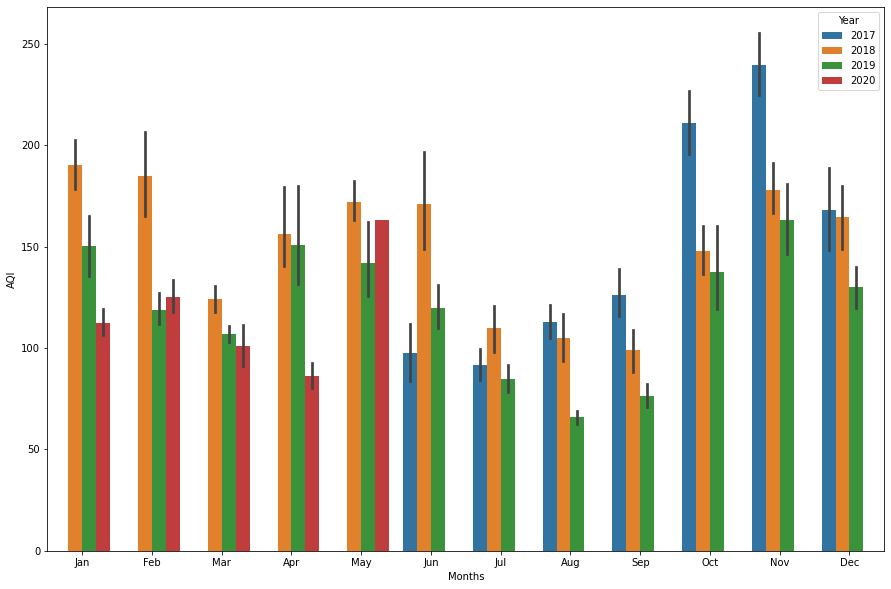

In [140]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Jaipur,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## July, August and September have the lowest average AQI for all years.

Text(0.5, 1.0, 'Jaipur AQI Trend 2019')

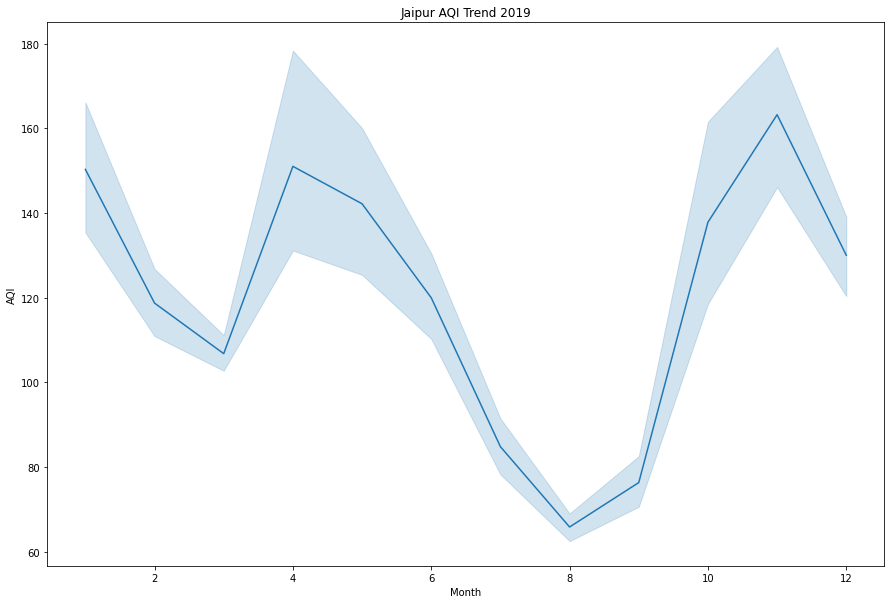

In [141]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Jaipur[Jaipur['Year']=='2019']).set_title("Jaipur AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2019 AQI falls from April onwards, lowest in the month of August and then rises steeply from September

Text(0.5, 1.0, 'Jaipur AQI Trend 2020')

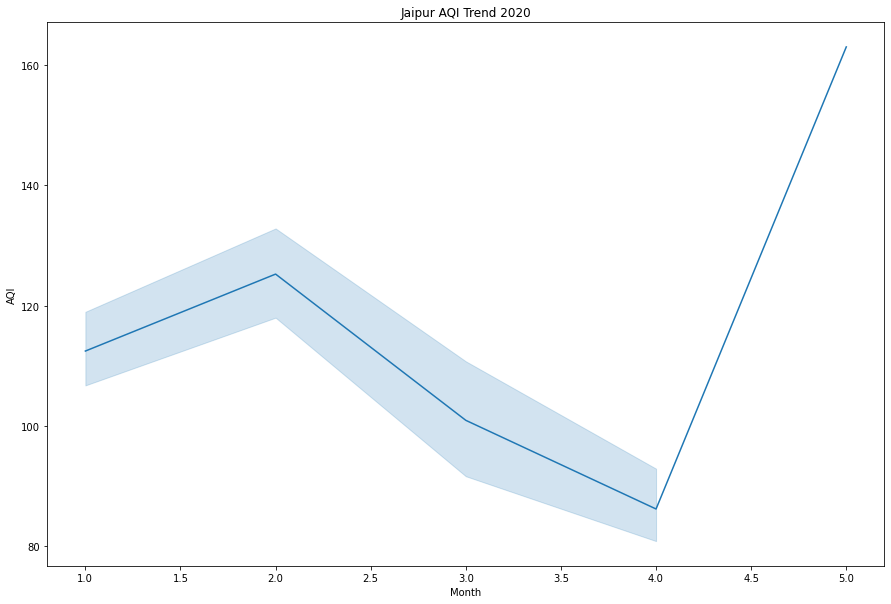

In [142]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Jaipur[Jaipur['Year']=='2020']).set_title("Jaipur AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2020, Like other cities, AQI has fallen from February onwards showing the effect of Corona.

## But unlike other Indian cities, from April onwards, the average AQI rises steeply.

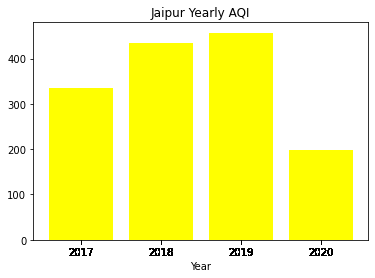

In [144]:
plt.bar(Jaipur.Year,Jaipur.AQI,color='Yellow')
plt.title('Jaipur Yearly AQI')
plt.xlabel('Year')
plt.xticks(Jaipur.Year)
#plt.ylabel('AQI')
plt.show()

## 2019 has the highest average AQI of 450+

## 2020 has the lowest average AQI showing the effect of Corona Virus on the city.

# Jorapokhar

In [146]:
Jorapokhar.Month.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int64)

In [147]:
Jorapokhar.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

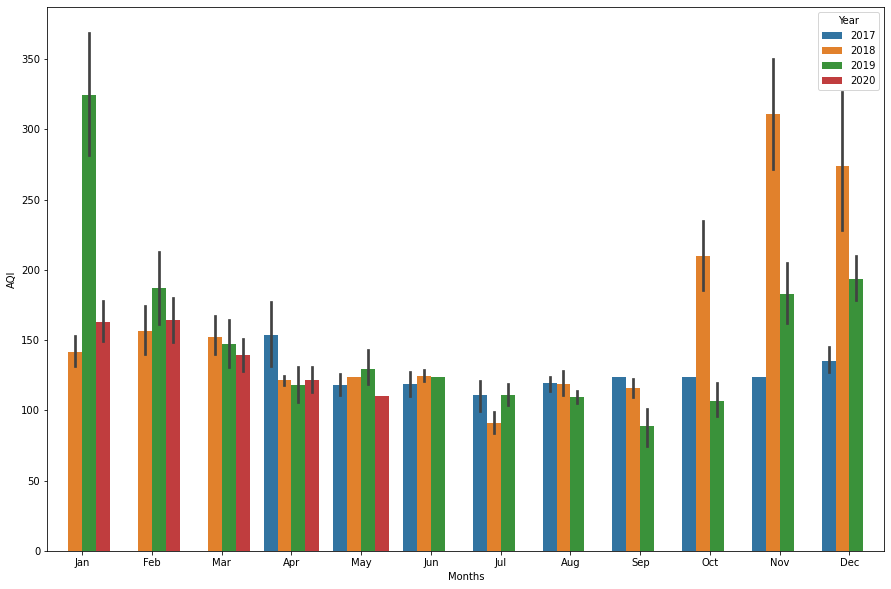

In [145]:
import seaborn as sns
mon=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Jorapokhar,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## November, December and January have the highest AQI for all the years

## In 2018, November had the highest average AQI while January had the highest in both 2019 and 2020.

Text(0.5, 1.0, 'Jorapokhar AQI Trend 2019')

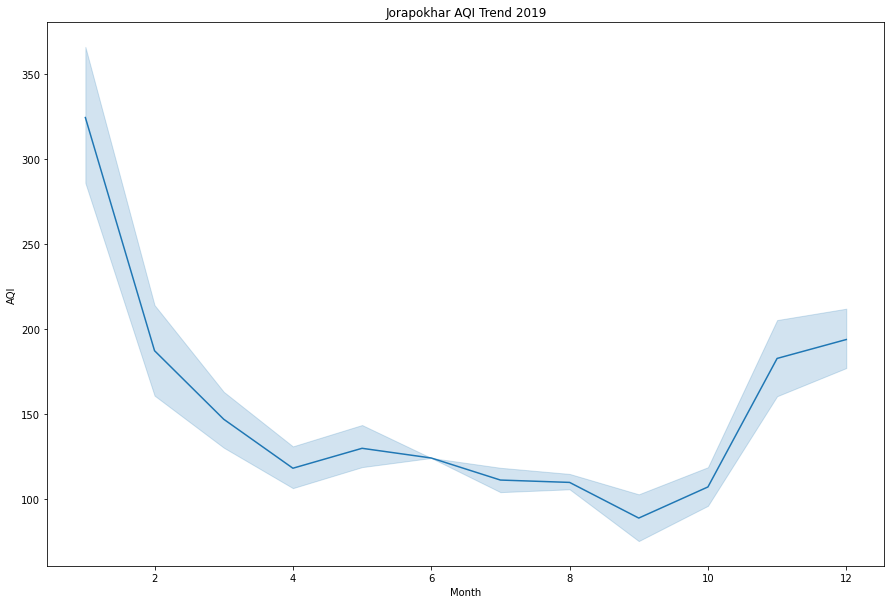

In [148]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Jorapokhar[Jorapokhar['Year']=='2019']).set_title("Jorapokhar AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## From January onwards the average AQI falls in 2019 only to rise a bit in November and December.

Text(0.5, 1.0, 'Jorapokhar AQI Trend 2020')

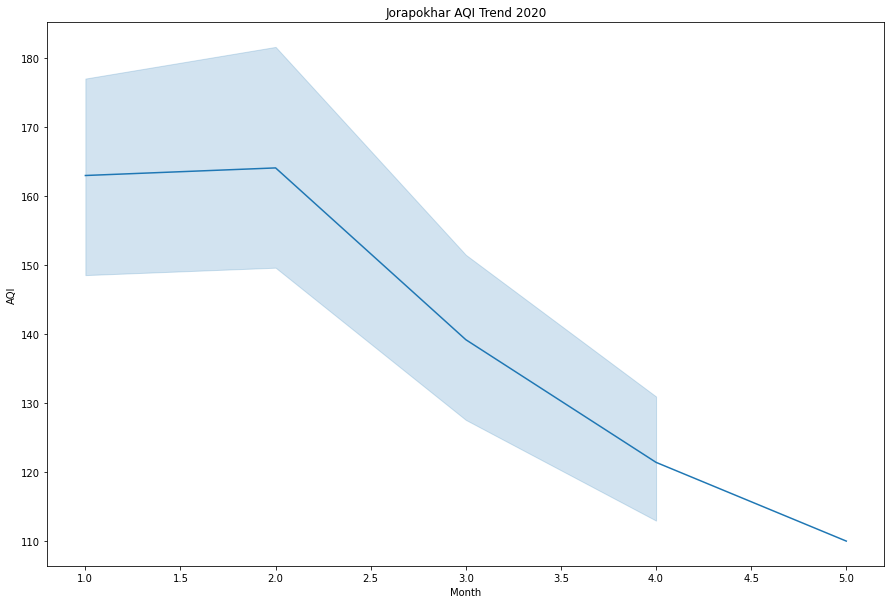

In [153]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Jorapokhar[Jorapokhar['Year']=='2020']).set_title("Jorapokhar AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Like other cities, AQI starts to fall from February in 2020, showing the effects of corona virus

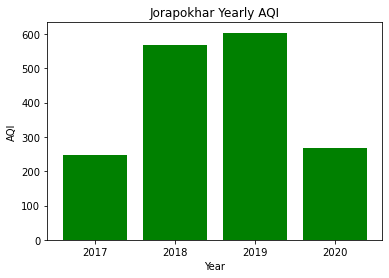

In [150]:
plt.bar(Jorapokhar.Year,Jorapokhar.AQI,color='Green')
plt.title('Jorapokhar Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Jorapokhar.Year)
plt.ylabel('AQI')
plt.show()

## 2019 has the highest yearly AQI. While 2020 has the lowest with around 3 times less than that of 2019. This shows that the residents of Jorapokhar maintained the lockdowns by government very strictly.

# Kochi

In [151]:
Kochi.Year.unique()

array(['2020'], dtype=object)

In [152]:
Kochi.Month.unique()

array([1, 2, 3, 4, 5], dtype=int64)

### With only 5 months of 2020 worth Data available, we cannot conclude much for Kochi

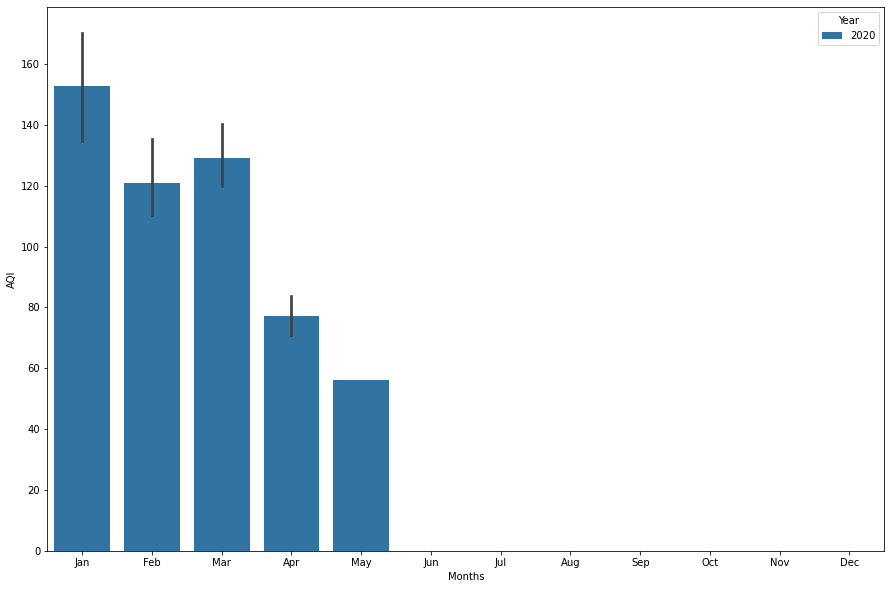

In [154]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Kochi,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Kolkata

In [155]:
Kolkata.Year.unique()

array(['2018', '2019', '2020'], dtype=object)

In [156]:
Kolkata.Month.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3], dtype=int64)

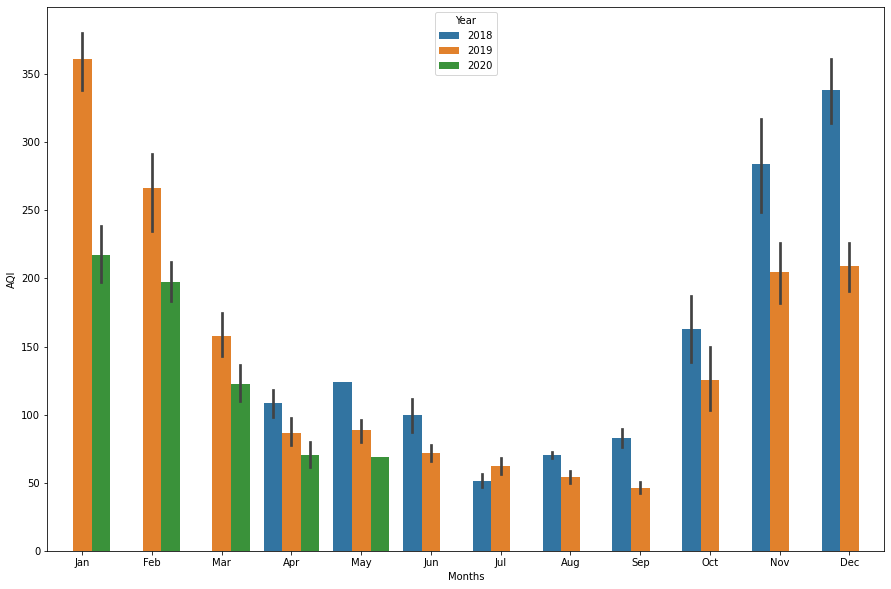

In [157]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Kolkata,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## April, May, June, July, August and September have consistently lower average monthly AQI

## December has the highest monthly AQI in 2018, while January has the highest monthly AQI for the years 2019 and 2020.

Text(0.5, 1.0, 'Kolkata AQI Trend 2019')

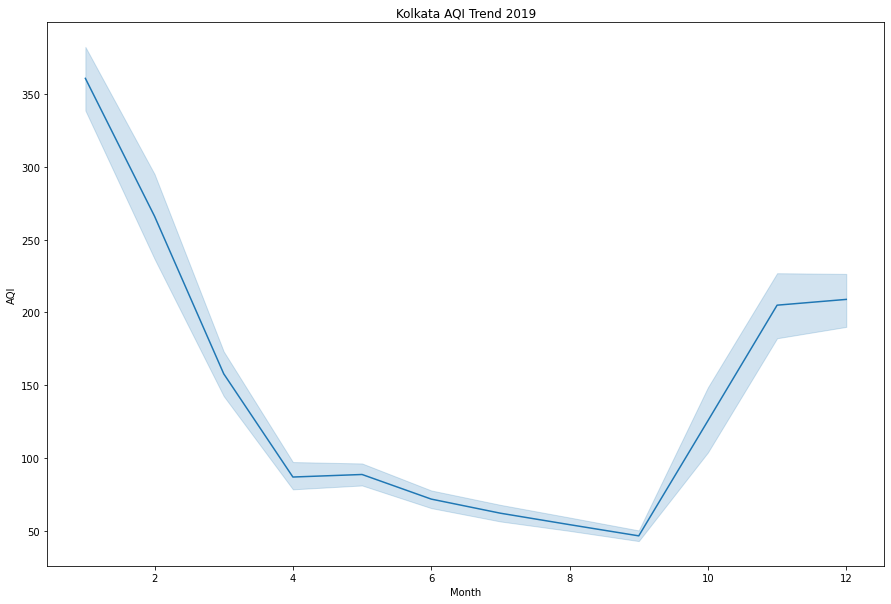

In [158]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Kolkata[Kolkata['Year']=='2019']).set_title("Kolkata AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2019, AQI falls steeply from January onwards, with the lowest AQI in the month of September, afterwards, AQI starts rising till December.

Text(0.5, 1.0, 'Kolkata AQI Trend 2020')

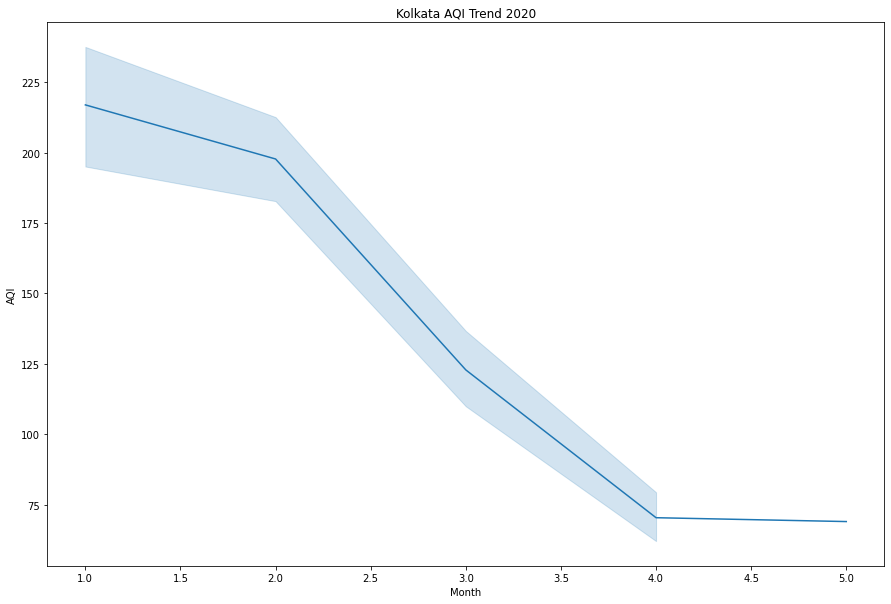

In [159]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Kolkata[Kolkata['Year']=='2020']).set_title("Kolkata AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Like other cities, AQI falls after February in 2020, showing the effect of Corona virus related government lockdowns.

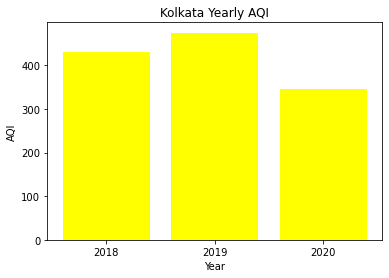

In [160]:
plt.bar(Kolkata.Year,Kolkata.AQI,color='Yellow')
plt.title('Kolkata Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Kolkata.Year)
plt.ylabel('AQI')
plt.show()

## 2019 has the highest yearly AQI of 450+

## 2020 has the lowest yearly average AQI of around 350, clearly showing the effect of Corona.

# Lucknow

In [161]:
Lucknow.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [162]:
Lucknow.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

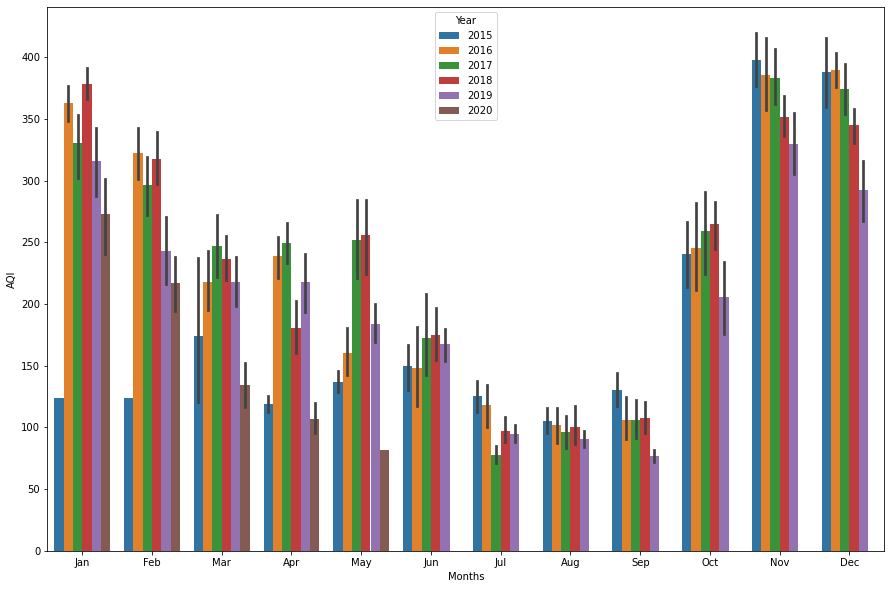

In [163]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Lucknow,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## November, December, January and February are having high monthly average AQI for every years, while July, August and September have AQI on the lower side.

Text(0.5, 1.0, 'Lucknow AQI Trend 2019')

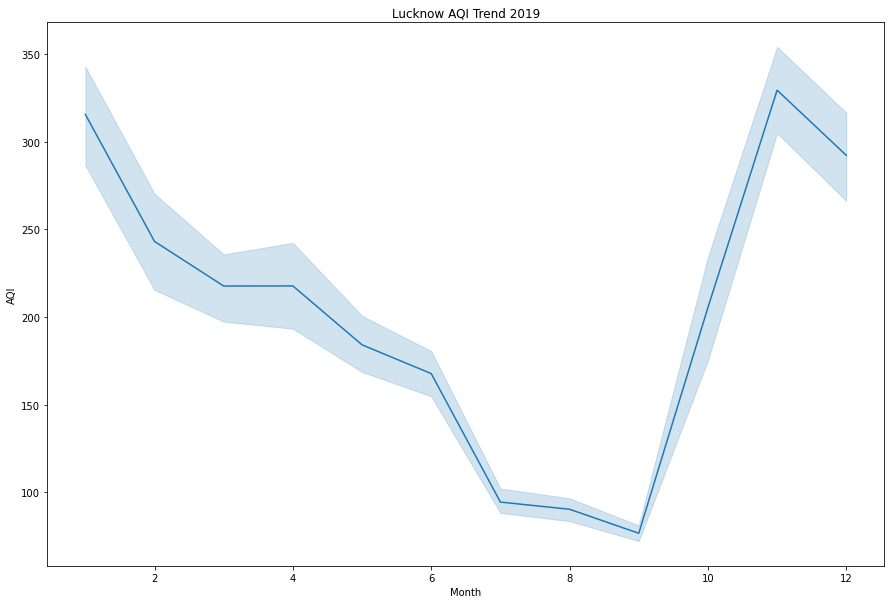

In [164]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Lucknow[Lucknow['Year']=='2019']).set_title("Lucknow AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2019, AQI falls till September, where it is the lowest. Afterwards, it rises steeply.

Text(0.5, 1.0, 'Lucknow AQI Trend 2020')

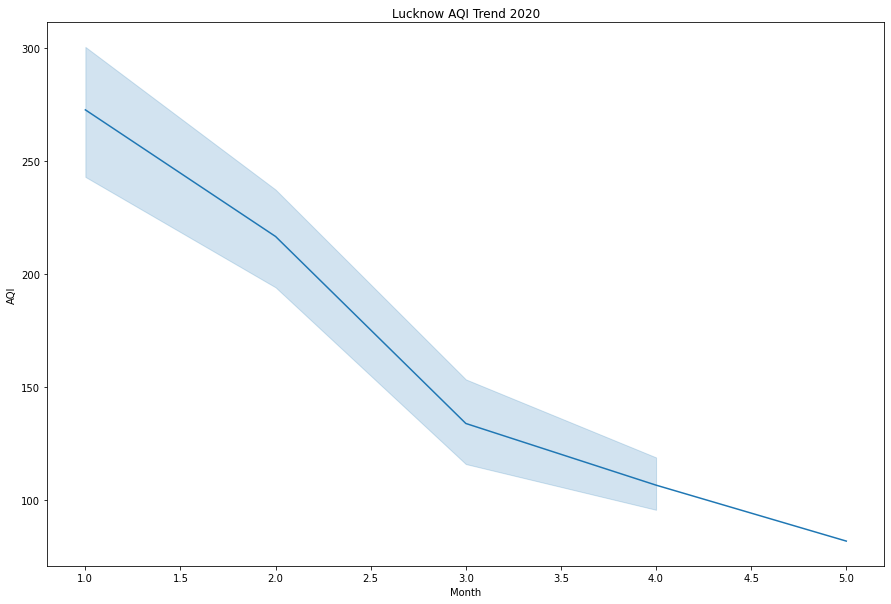

In [165]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Lucknow[Lucknow['Year']=='2020']).set_title("Lucknow AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Like the other cities, monthly AQI falls after February in 2020, showing the effect of Corona

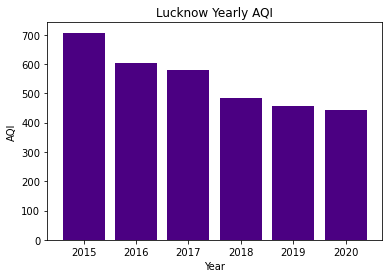

In [166]:
plt.bar(Lucknow.Year,Lucknow.AQI,color='Indigo')
plt.title('Lucknow Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Lucknow.Year)
plt.ylabel('AQI')
plt.show()

## 2015 has the highest yearly AQI of 700.

## AQI is the lowest in 2020 with around 450 showing the effect of corona

# Mumbai

In [167]:
Mumbai.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [168]:
Mumbai.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

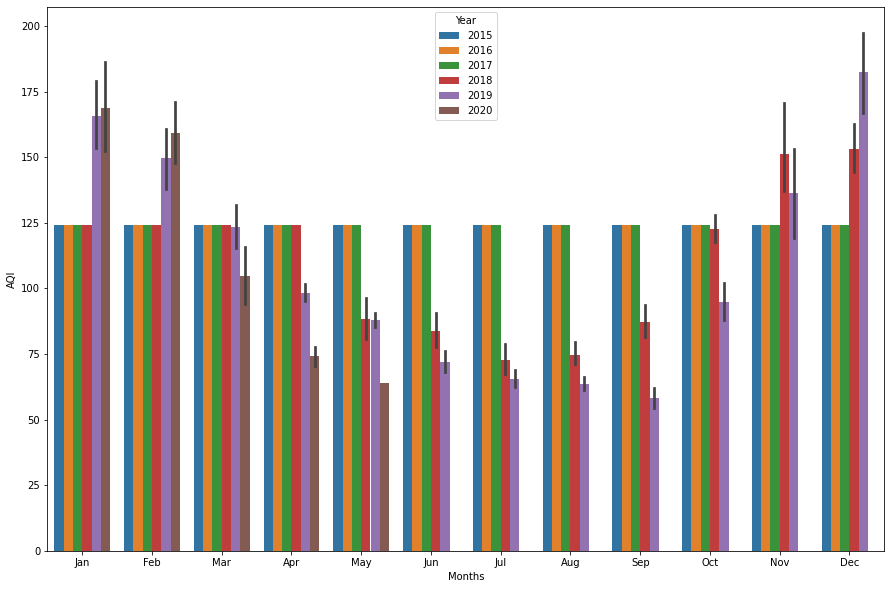

In [169]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Mumbai,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

Text(0.5, 1.0, 'Mumbai AQI Trend 2019')

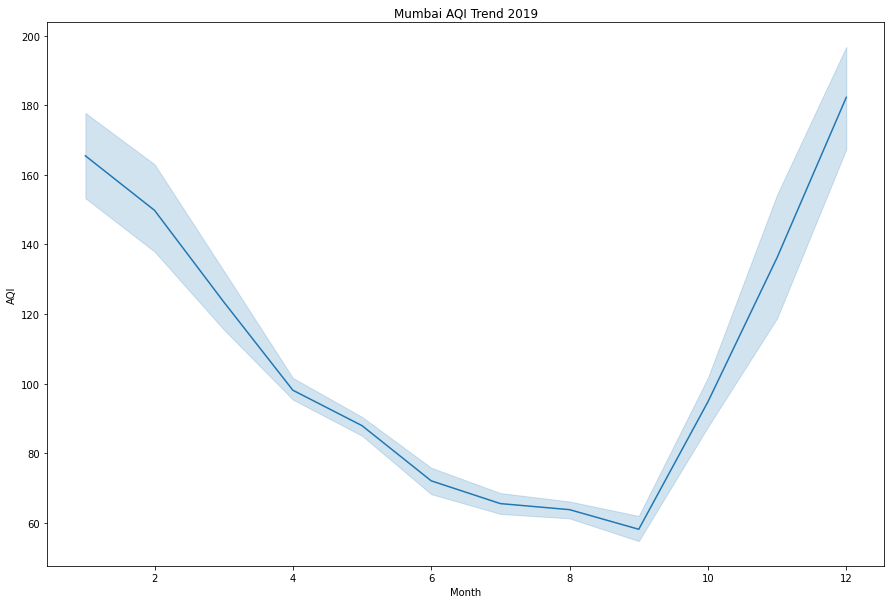

In [170]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Mumbai[Mumbai['Year']=='2019']).set_title("Mumbai AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2019, monthly AQI drops until September where it is the lowest. Afterwards, it rises very steeply.

Text(0.5, 1.0, 'Mumbai AQI Trend 2020')

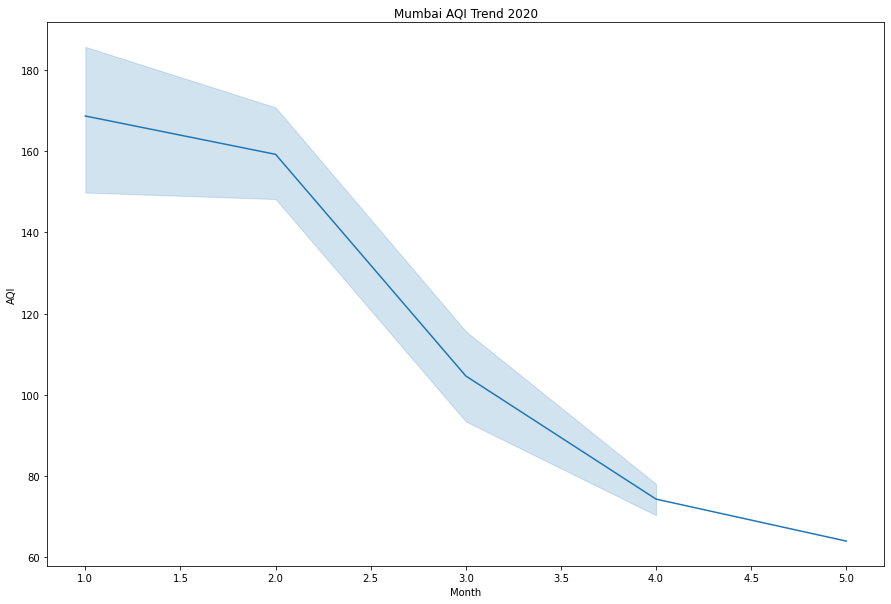

In [171]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Mumbai[Mumbai['Year']=='2020']).set_title("Mumbai AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Like all the other cities, AQI of Mumbai falls from February onwards owing to the government imposed lockdowns in 2020

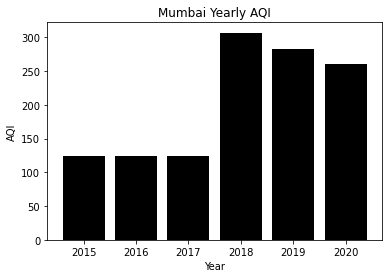

In [172]:
plt.bar(Mumbai.Year,Mumbai.AQI,color='Black')
plt.title('Mumbai Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Mumbai.Year)
plt.ylabel('AQI')
plt.show()

## 2018 has the highest yearly AQI with 300

## 

# Patna

In [173]:
Patna.Year.unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [174]:
Patna.Month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

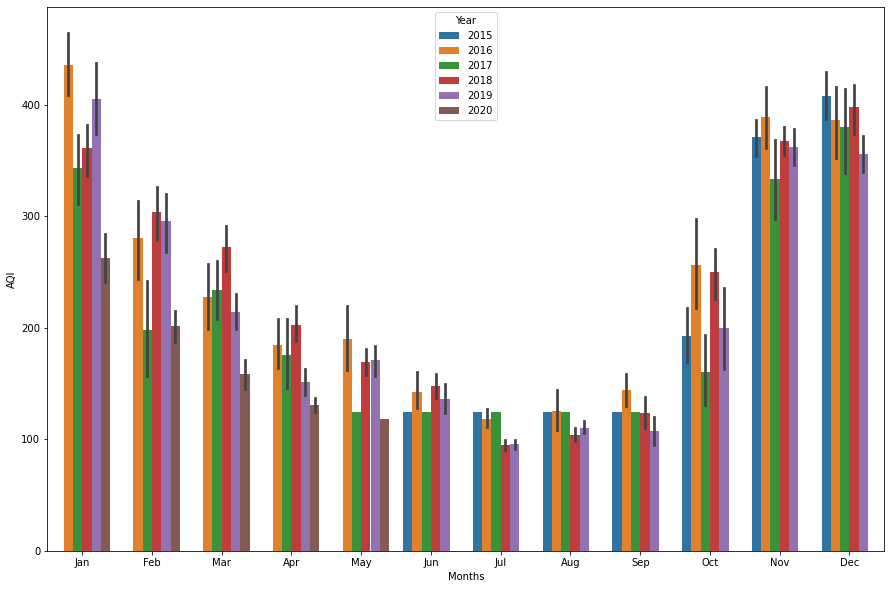

In [175]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Patna,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## November, December and January have high monthly AQI every year.

## June, July, August and September have low AQI every year.

Text(0.5, 1.0, 'Patna AQI Trend 2019')

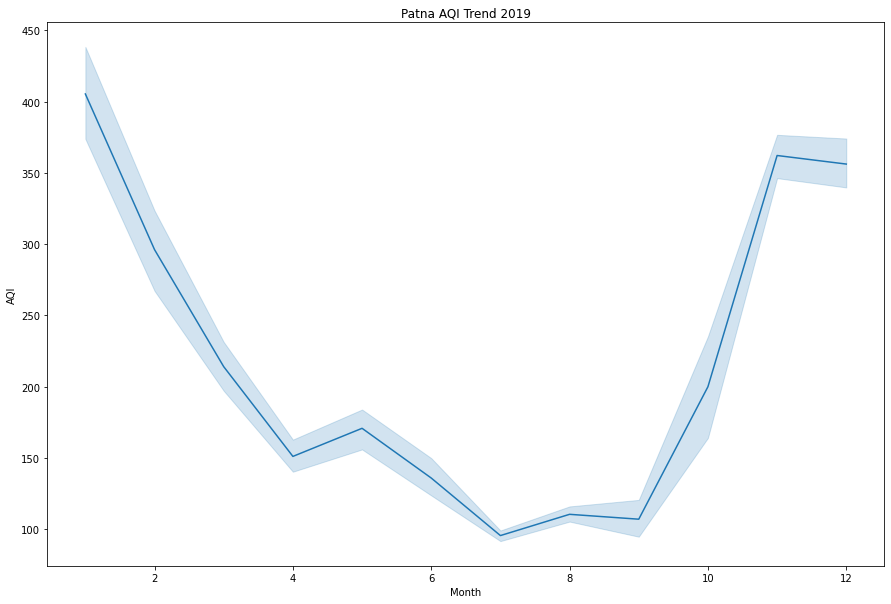

In [176]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Patna[Patna['Year']=='2019']).set_title("Patna AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## In 2019, AQI falls till September. July has the lowest AQI

## From September onwards, AQI rises steeply till November

Text(0.5, 1.0, 'Patna AQI Trend 2020')

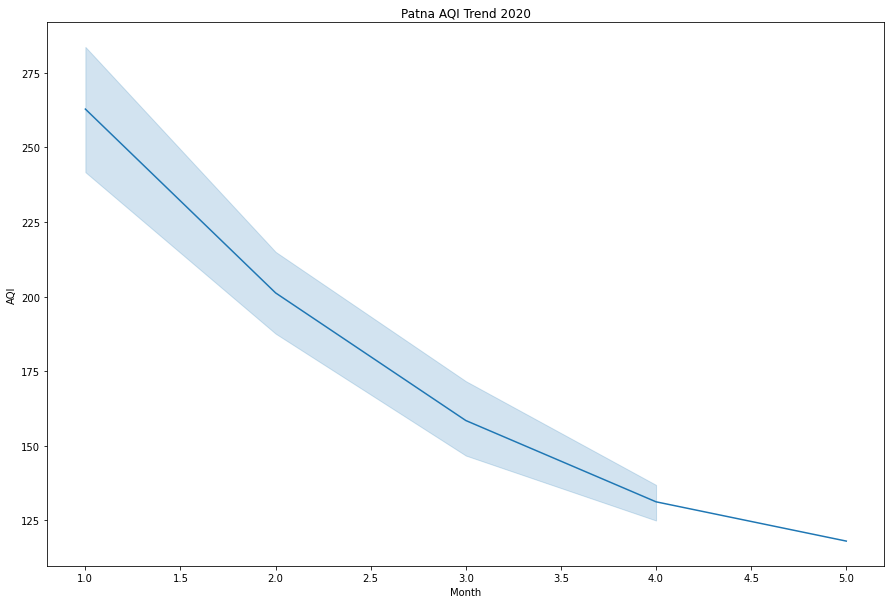

In [177]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Patna[Patna['Year']=='2020']).set_title("Patna AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## Like other cities in 2020, AQI falls steeply from February onwards owing to government lockdowns

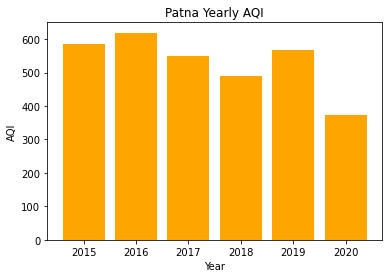

In [178]:
plt.bar(Patna.Year,Patna.AQI,color='Orange')
plt.title('Patna Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Patna.Year)
plt.ylabel('AQI')
plt.show()

## 2016 has the highest yearly AQI with 600+

## 2020 has the lowest AQI showing the effect of Corona

# Shillong

In [179]:
Shillong.Year.unique()

array(['2019', '2020'], dtype=object)

In [180]:
Shillong.Month.unique()

array([ 8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

### Shillong has data of few months of 2019 and 2020 only

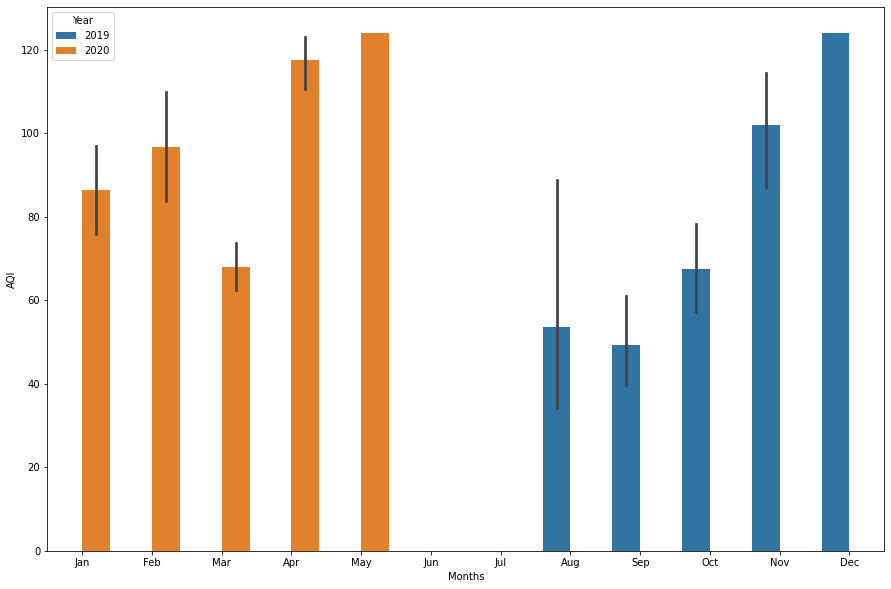

In [181]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Shillong,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

## May has highest monthly AQI in 2020 while December has the highest AQI in 2019

## Like other cities, AQI fell after February of 2020. But unlike others, AQI started rising post March, showing the lack of maintanence of government lockdown by the residents of Shillong.

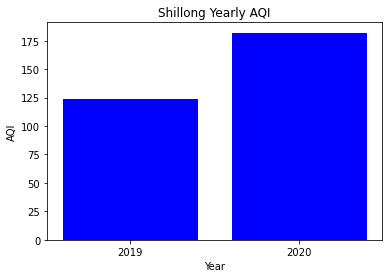

In [182]:
plt.bar(Shillong.Year,Shillong.AQI,color='Blue')
plt.title('Shillong Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Shillong.Year)
plt.ylabel('AQI')
plt.show()

## Unlike other cities, Shillong saw an increase in yearly AQI in 2020 from 2019.

# Talcher

In [183]:
Talcher.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [184]:
Talcher.Month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

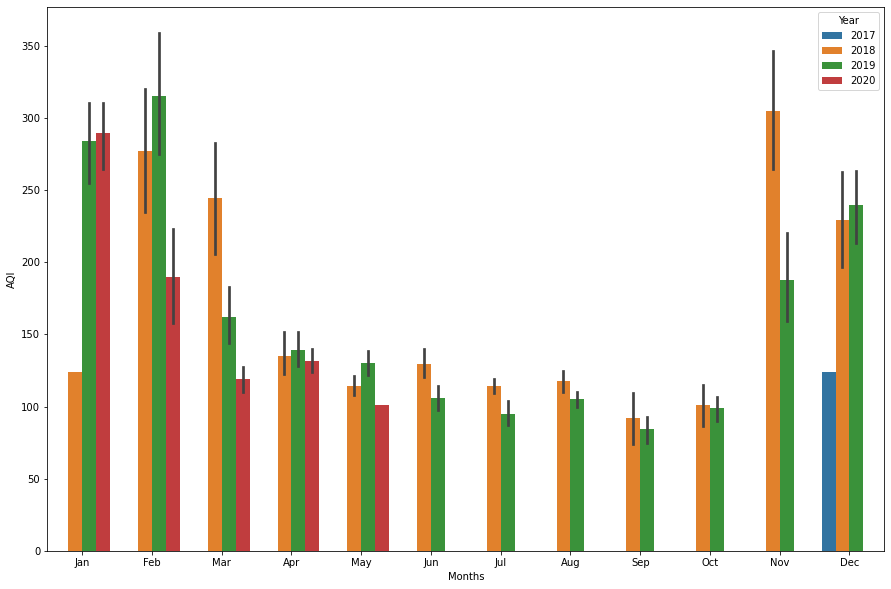

In [185]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Talcher,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### November, December, January and February have more or less high monthly AQI for all years

Text(0.5, 1.0, 'Talcher AQI Trend 2019')

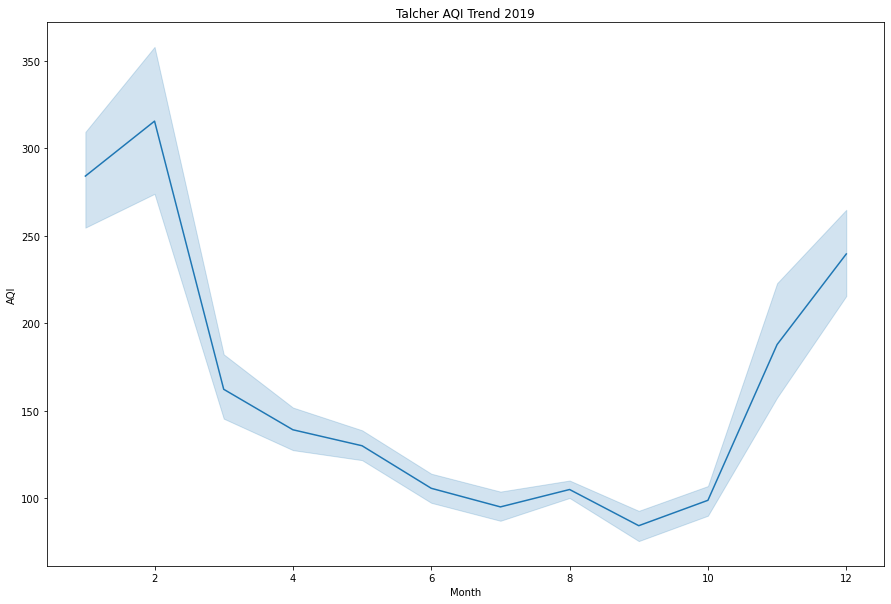

In [186]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Talcher[Talcher['Year']=='2019']).set_title("Talcher AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2019, AQI fell after February. AQI rose steeply from October onwards.

Text(0.5, 1.0, 'Talcher AQI Trend 2020')

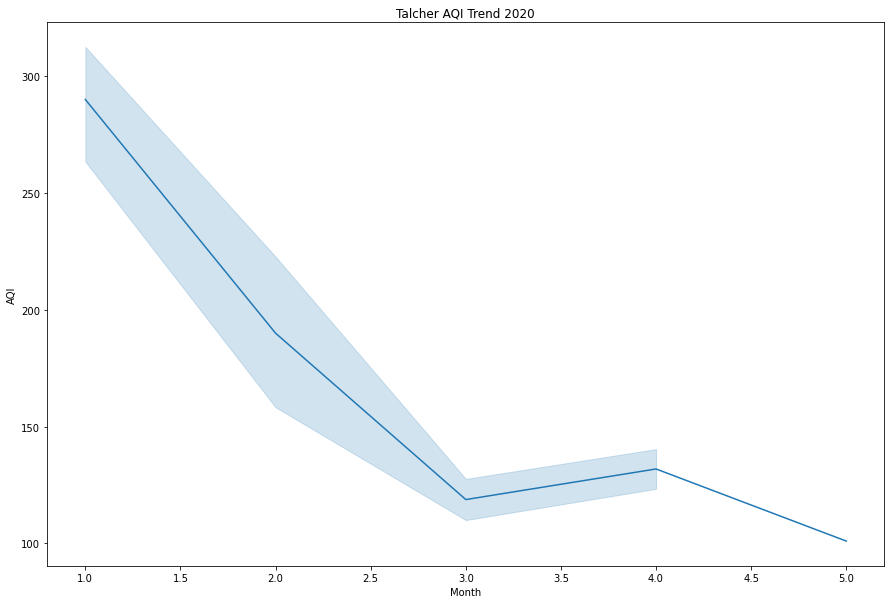

In [187]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Talcher[Talcher['Year']=='2020']).set_title("Talcher AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2020, AQI fell from January. But it rose a bit fro March to April only to fall afterwards.

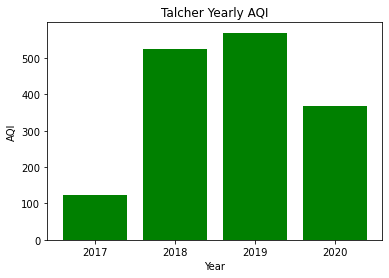

In [188]:
plt.bar(Talcher.Year,Talcher.AQI,color='Green')
plt.title('Talcher Yearly AQI')
plt.xlabel('Year')
#plt.xticks(Talcher.Year)
plt.ylabel('AQI')
plt.show()

## 2019 has the highest yearly average AQI

## AQI fell drastically in 2020 showing the effect of Corona virus

# Thiruvananthapuram

In [189]:
Thiruvananthapuram.Year.unique()

array(['2017', '2018', '2019', '2020'], dtype=object)

In [190]:
Thiruvananthapuram.Month.unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

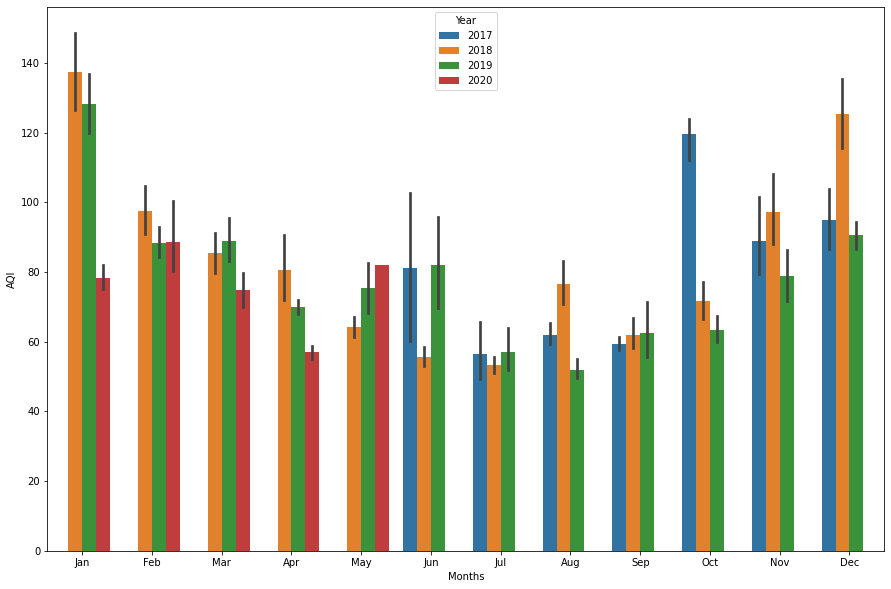

In [193]:
import seaborn as sns
mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(y='AQI',x='Months',hue='Year',data=Thiruvananthapuram,order=mon)
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### January and December have high monthly AQI for each year

### July, August and September have low AQI for each year

Text(0.5, 1.0, 'Thiruvananthapuram AQI Trend 2019')

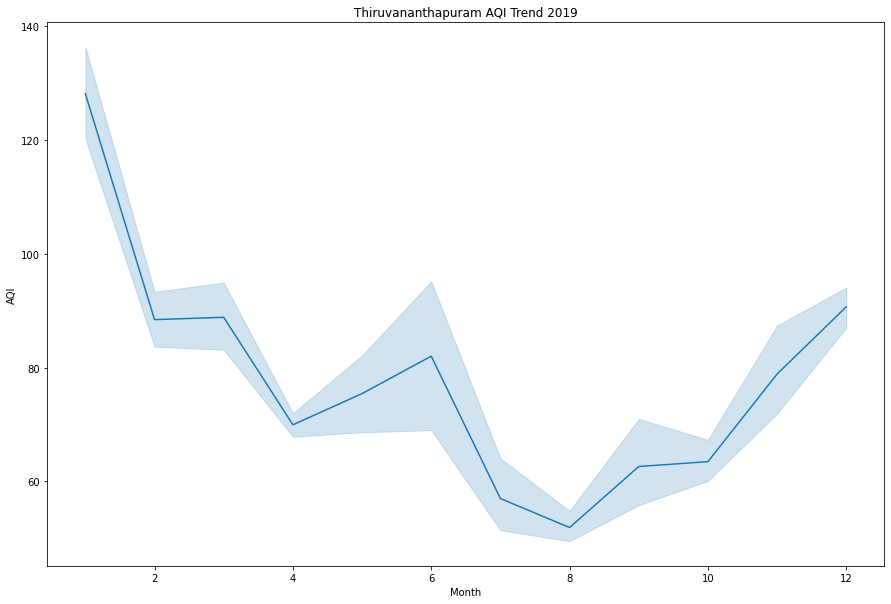

In [191]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Thiruvananthapuram[Thiruvananthapuram['Year']=='2019']).set_title("Thiruvananthapuram AQI Trend 2019")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### August has the lowest AQI of 2019

Text(0.5, 1.0, 'Thiruvananthapuram AQI Trend 2020')

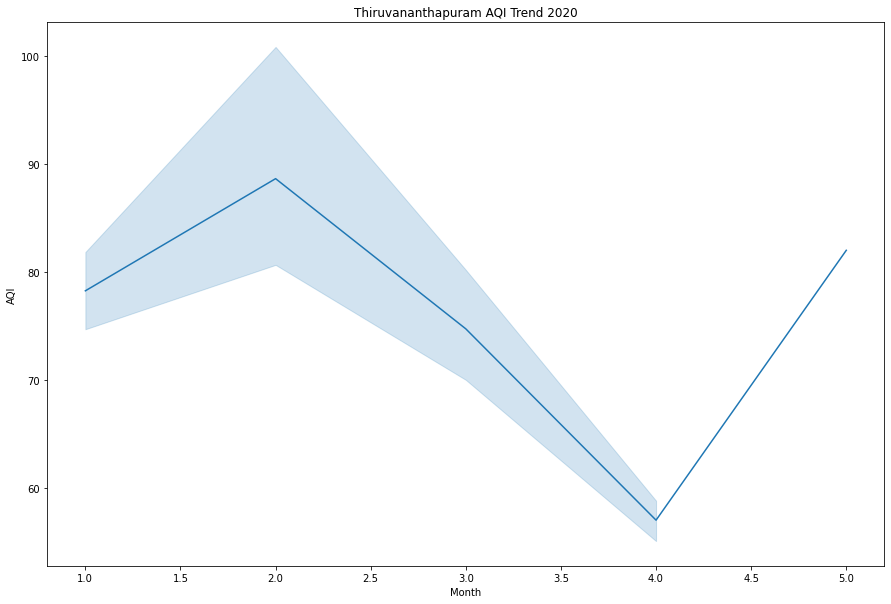

In [192]:
import seaborn as sns
#mon = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
dim = (15,10)
fig, ax = plt.subplots(figsize=dim)
sns.lineplot(y='AQI',x='Month',data=Thiruvananthapuram[Thiruvananthapuram['Year']=='2020']).set_title("Thiruvananthapuram AQI Trend 2020")
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

### In 2020, AQI fell after February due to government lockdown. But it rises from April to MAY.

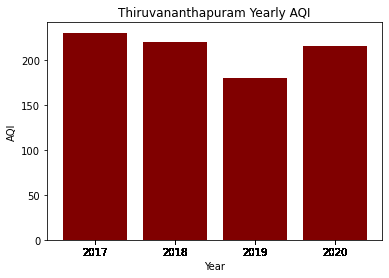

In [156]:
plt.bar(Thiruvananthapuram.Year,Thiruvananthapuram.AQI,color='Maroon')
plt.title('Thiruvananthapuram Yearly AQI')
plt.xlabel('Year')
plt.xticks(Thiruvananthapuram.Year)
plt.ylabel('AQI')
plt.show()

## 2019 has the lowest yearly AQI , while it rises in 2020

## This shows that Thiruvananthapuram is not as much affected by Corona lockdowns as many other cities in India.